In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas.plotting import scatter_matrix
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
import seaborn as sns
import re
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import math


from IPython.display import Markdown

from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.manifold import TSNE
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Business Understanding

It is no secret that the objective of every business is to increase their size whether it be sales or market share which is indicative of growth. Only recently did we hear that Apple has hit a company valuation of one trillion Dollars. One colossal driver for that success is the behind-the-scenes market analytics that researches the consumers willing to spend thousands of dollars on tech products. This is why consumer data is probably one of the most sought after and inaccessible type of data category in the world.

Insights into your customers = Actional intel = $

We were lucky to find a dataset which contained two years worth of transactions for a UK based online retail store. The company sells “unique all-occasion gifts.” The dataset, “E-Commerce Data,” was downloaded from Kaggle: https://www.kaggle.com/carrie1/ecommerce-data

For the last 50 years, one extremely powerful method of understanding a business’s market or customer base is through market segmentation. Companies that try to market products to the masses or approach their marketing through a “one-size-fits-all” methodology will eventually fail. Market segmentation divides the customer base into groups of individuals that are similar in specific ways. The following tables illustrates the core ways of segmenting customers:


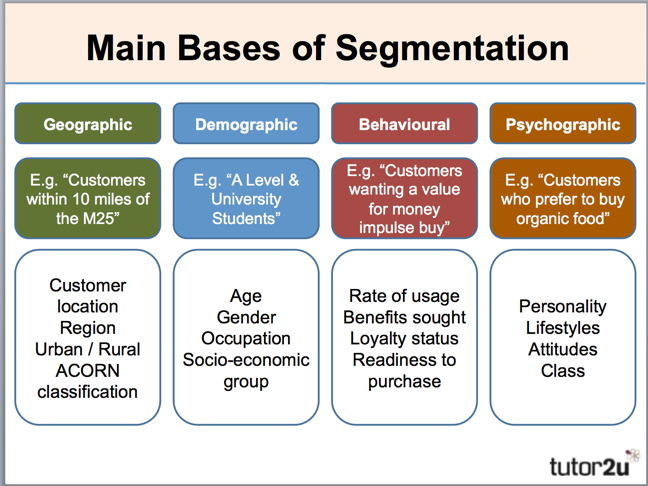

TypeError: a bytes-like object is required, not 'NoneType'

TypeError: a bytes-like object is required, not 'NoneType'

<IPython.core.display.Image object>

In [2]:
display(Image('https://s3-eu-west-1.amazonaws.com/tutor2u-media/subjects/business/diagrams/marketing-segmentation-bases1.jpg', width=700, unconfined=True))
display(Image('https://s3-eu-west-1.amazonaws.com/tutor2u-media/subjects/business/diagrams/marketing-segments-intro.jpg', width=700, unconfined=True))

The benefits of this practice is invaluable to the business and include: 
1. Marketing efficiency: 80/20 rule focus on the customers that add more value to the business. 
2. Identifying and determining new market opportunities: Through clustering, we can possibly identify missed opportunities.
3. Improved distribution strategies: Clustering using geographical data allows us to funnel more resources towards those areas. 
4. Customer Loyalty: Clustering may possibly identify behavioral and psychological behaviors that drives customer retention towards the business. 
In this project, we will lead an investigation using clustering based methodology to identify and then improve market segmentation for the UK business.  This chosen validation method is proven and practiced all over the world. The most prominent segmentation will be either customer sales which is indicative of size or value to the business or customer geography. 

---
We will follow the protocols outlined in the BLT section 10.8 – Clustering Evaluation to measure the effectiveness of our algorithms/methods. This includes using cluster validity estimation which a measure of goodness of created clusters. Although such measure is inherently subjective, we can still determine clustering tendency of the data set. We can also compare the results of two different sets of cluster analysis. We will also do a visual inspection and determine a similarity matrix. The third evaluation method is to do an internal measure which is the SSE graph vs the number of clusters. Finally, we will be examining the silhouette score as well. 

---

As discussed previously, our chosen validation methods have been suggested by professor Larson and are generally accepted as industry standard. We’ve also determined that for the stakeholder, if the clustering conclusions resulted in actional insights that the business can capitalize on, then we have met their needs. 

Table Sources: https://www.tutor2u.net/business/reference/market-segmentation 

# Data Understanding


### Data Exploration:
There are 541,909 records in our online marketing data research. This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Following are the factor names and descriptions:

|<p align="">Factor Name |<p align="">Type|<p align=""> Description |
|--------|------------|-------------|
|<p align="">**InvoiceNo**| <p align="">Nominal|<p align="">A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation|
|<p align="">**StockCode**|<p align="">Nominal|<p align="">A 5-digit integral number uniquely assigned to each distinct product.|
|<p align="">**Description**|<p align="">Nominal|<p align="">Product (item) name.|
|<p align="">**Quantity**|<p align="">Numeric|<p align="">The quantities of each product (item) per transaction.|
|<p align="">**InvoiceDate**|<p align="">Numeric|<p align="">The day and time when each transaction was generated|
|<p align="">**UnitPrice**|<p align="">Numeric|<p align="">Product price per unit in sterling.|
|<p align="">**CustomerID**|<p align="">Nominal|<p align="">A 5-digit integral number uniquely assigned to each customer.|
|<p align="">**Country**|<p align="">Nominal|<p align="">The name of the country where each customer resides|
<BR>

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

* Description: Product (item) name. Nominal. 

* Quantity: The quantities of each product (item) per transaction. Numeric.	

* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 

* UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

* Country: Country name. Nominal, the name of the country where each customer resides. 


In [3]:
# Import Online marketing data
marketing_data = pd.read_excel('./Data/Online Retail.xlsx')

In [4]:
marketing_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Data types information of each attributes:  
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Find the number of missing values in each column:
print(marketing_data.isnull().sum(axis=0))

na_cols = marketing_data.loc[:,marketing_data.isnull().mean()>.0].columns

for col in na_cols:
    print(col, ' column is ',round(marketing_data[col].isnull().mean(),5)*100,'% null')

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Description  column is  0.268 % null
CustomerID  column is  24.927 % null


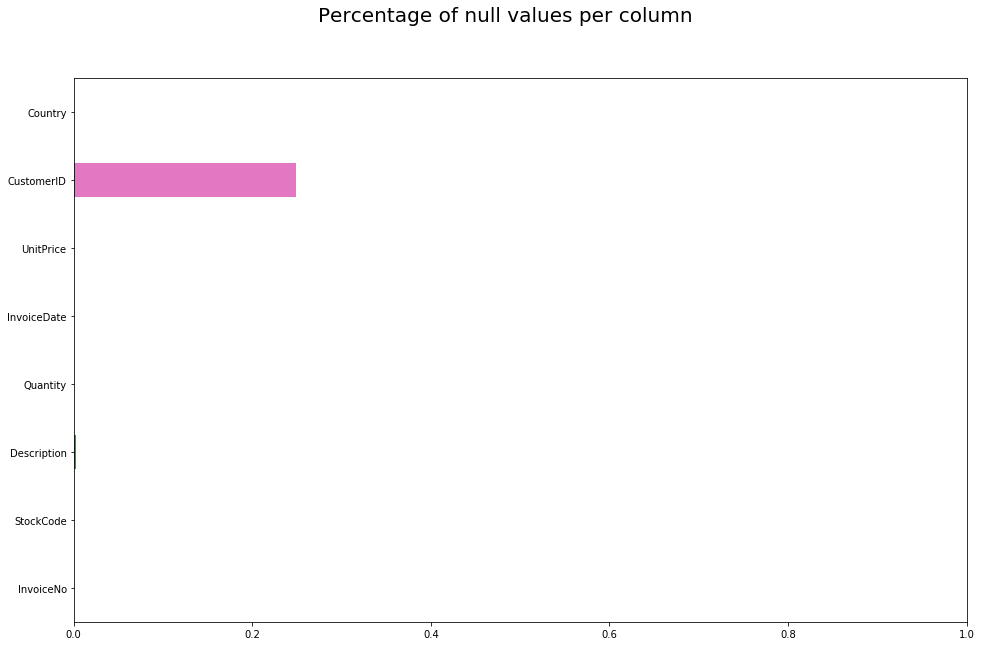

In [7]:
plt.figure(figsize=(16,10))
plt.xlim(0,1)
plt.suptitle('Percentage of null values per column', size=20)
marketing_data.isnull().mean().plot.barh();
plt.show()

When looking at the number of missing values in each attribute, we found there are 135,080 records, almost 25% of our data set, where CustomerID was null. Part of our research is based on identifying high value customers. We looked at creating a unique CustomerID for each country where Customer ID is null.  This created a highly valuable single customer, which most likely does not exist.  We decided to remove the records where CustomerID was null for this part of the research. However part of our research also looks to develop Association Rules. This part of the research benefits from retaining as much data as possible. Our final decsision was to use a data set with CustomerID removed where CustomerID was an important feature, and use a second data set retaining all CustomerID's that are null and assigning a unique number for each country.

In [8]:
# Make the duplicate of the data set
marketing_data_copy = marketing_data.copy()

# Remove the rows with missing in CustomerID column:
marketing_data.dropna(subset=['CustomerID'], inplace=True)

In [9]:
# Find the first and last orders in our dataset:
marketing_data['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [10]:
marketing_data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

This dataset includes orders done between Dec 2010 and Dec 2011.

In [11]:
marketing_data.shape

(406829, 8)

In [12]:
# Now we have both datasets with no null values
marketing_data.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
# The data set with CustomerID also has no null values
marketing_data_copy.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Now, checking to identify duplicates in our dataset, we found 5,225 duplicate rows and removed them.

In [14]:
# Find and remove the duplicate records
display('Duplicated records: {}'.format(marketing_data.duplicated().sum()))
marketing_data.drop_duplicates(inplace = True)

'Duplicated records: 5225'

In [15]:
marketing_data.shape

(401604, 8)

We are replacing all descriptions that don't have any letters or are not strings.

In [16]:
for ind,el in enumerate(marketing_data['Description']):
    if type(el) != str:
        marketing_data.loc['Description',ind]='Unknown'
    elif re.match('.*[a-zA-Z]+.*',el) is not None:
        pass
    else:
        marketing_data.loc[ind,'Description']='Unknown'

$\textbf{New Features}$<BR>
Our research required we created new features to helps us better understand the data perform some the analysis we were interested in. These are the new features: 

|<p align="">Feature |<p align=""> Description |
|--------|------------|
|<p align="">**TotalPrice**| <p align="">It is the total price of each items (Quantity * Unit Price)|
|<p align="">**Recency**|<p align="">It is the number of days since last purchase for each invoice and customer|
|<p align="">**Frequency**|<p align="">Total number of purchases for each customer (it will be imputed in groupby customer section)|
|<p align="">**Monetary**|<p align="">Total money that each customer spent (it will be imputed in groupby customer section)|
<BR>


In [17]:
# Create the TotalPrice feature
marketing_data['TotalPrice'] = marketing_data['Quantity']*marketing_data['UnitPrice']

In [18]:
# Create Recency Feature for each invoice:
Current=marketing_data['InvoiceDate'].max()
marketing_data['Recency']=(Current-marketing_data['InvoiceDate']).astype('timedelta64[D]')




In [19]:
marketing_data['Recency']=marketing_data['Recency'].astype(float)


Here the Recency column has timedelta64[ns] data type. For easier use in our analysis, 
we extract the days in integer format, representing the number of days since the maximum date in our dataset.

In [20]:
marketing_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373.0


In [21]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
TotalPrice     401604 non-null float64
Recency        401604 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 33.7+ MB


$\textbf{Examine data grouped by country}$<BR>
    Create a data frame that shows the number of unique feautures in each country. We are looking to see if there is any interesting data that shows up based on which countries orders come from. We want to see which specific countries buy the most items at one time, buys the most expensive items, and spends the most money on any single item. This information may be actionable by the business.

In [22]:
per_country = marketing_data.groupby(['Country']).nunique()
per_country= per_country.drop('Country',axis=1)
per_country.reset_index(level=0, inplace=True)
per_country[['Country','InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID']]


,Country,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,Australia,69,600,609,67,66,77,9
1,Austria,19,307,307,23,19,44,11
2,Bahrain,2,16,16,8,2,8,2
3,Belgium,119,778,785,38,119,66,25
4,Brazil,1,32,32,7,1,16,1
5,Canada,6,147,147,19,6,30,4
6,Channel Islands,33,430,436,25,33,55,9
7,Cyprus,20,498,498,29,20,56,8
8,Czech Republic,5,25,25,12,5,17,1
9,Denmark,21,251,252,35,21,44,9


The chart below shows the number of unique customer ID's in each country.

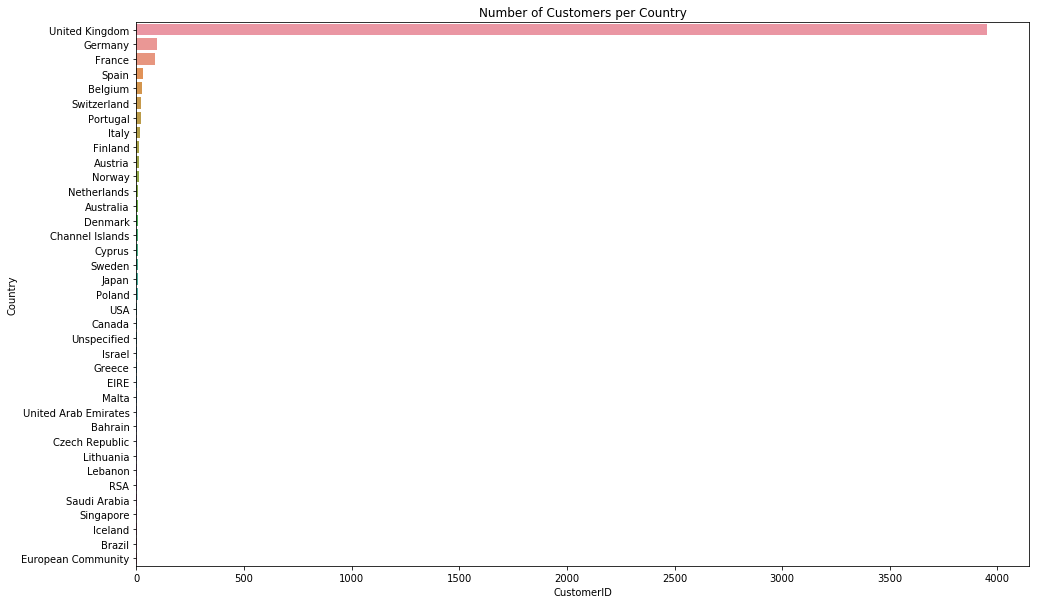

,CustomerID,Country
35,3950,United Kingdom
14,95,Germany
13,87,France
30,31,Spain
3,25,Belgium
32,21,Switzerland
26,19,Portugal
18,15,Italy
12,12,Finland
1,11,Austria


In [23]:
per_country.sort_values(by=['CustomerID'],ascending=False,inplace=True)
num_cust = per_country['CustomerID']
country = per_country['Country']
plt.figure(figsize=(16,10))
#plt.barh(country, num_cust,)
#plt.xticks(y_pos, country )
#ax = sns.barplot(x=num_cust,y=country,orient='h')
#ax.set(xlabel ='Number of Customer', ylabel='Country')
plt.title('Number of Customers per Country')
plt.xlabel('Number of Customers')
#ax.fig.set_size_inches(15,15)
sns.barplot(x=num_cust,y=country,orient='h')
plt.show()
display(per_country[['CustomerID','Country']])

The United Kingdom dominates our customer list. In fact over 90% of customers are from the United Kingdom

'90.18% of customers are in the United Kingdom'

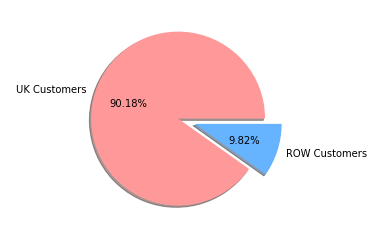

In [24]:
cust_UK_row = per_country.loc[per_country['Country'] =='United Kingdom']
cust_UK = cust_UK_row['CustomerID'].sum()
cust_ROW_row = per_country.loc[per_country['Country']!='United Kingdom']
cust_ROW = cust_ROW_row['CustomerID'].sum()

display('{0:.2%} of customers are in the United Kingdom'.format((cust_UK/(cust_UK+cust_ROW))))
labels = 'UK Customers','ROW Customers'
cust_count = [cust_UK, cust_ROW]
colors = ['#ff9999','#66b3ff']
explode = [0,0.2]
plt.axis('equal')   
plt.pie(cust_count, labels=labels, explode=explode, colors=colors, autopct='%1.2f%%', shadow=True, startangle=0)
plt.show()

In [25]:
count_by_country = marketing_data.groupby(['Country']).count()
count_by_country['Avg_UnitPrice'] = marketing_data.groupby(['Country'])['UnitPrice'].mean()
count_by_country['Avg_Quantity'] = marketing_data.groupby(['Country'])['Quantity'].mean()
count_by_country['Avg_TotalPrice'] = marketing_data.groupby(['Country'])['TotalPrice'].mean()
count_by_country.reset_index(level=0, inplace=True)
count_by_country.sort_values(by=['CustomerID'],ascending=False,inplace=True)


This chart below is showing us which country is buying the most of any single item.

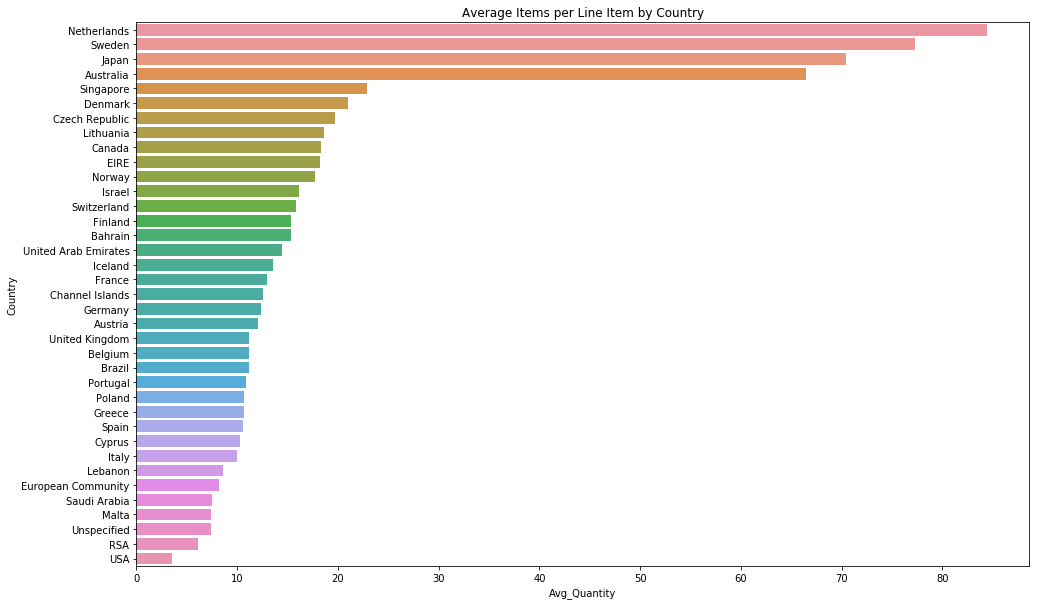

,Avg_Quantity,Country
23,84.406580,Netherlands
31,77.292842,Sweden
19,70.441341,Japan
0,66.488871,Australia
29,22.855895,Singapore
9,21.048843,Denmark
8,19.733333,Czech Republic
21,18.628571,Lithuania
5,18.298013,Canada
10,18.218997,EIRE


In [26]:
count_by_country.sort_values(by=['Avg_Quantity'],ascending=False,inplace=True)
avg_quantity = count_by_country['Avg_Quantity']

country = count_by_country['Country']
plt.figure(figsize=(16,10))
plt.title('Average Items per Line Item by Country')
plt.xlabel('Number of Customers')
#ax.fig.set_size_inches(15,15)
sns.barplot(x=avg_quantity,y=country,orient='h')
plt.show()
display(count_by_country[['Avg_Quantity', 'Country']])

The chart below is showing us which country is buying the most expensive items.

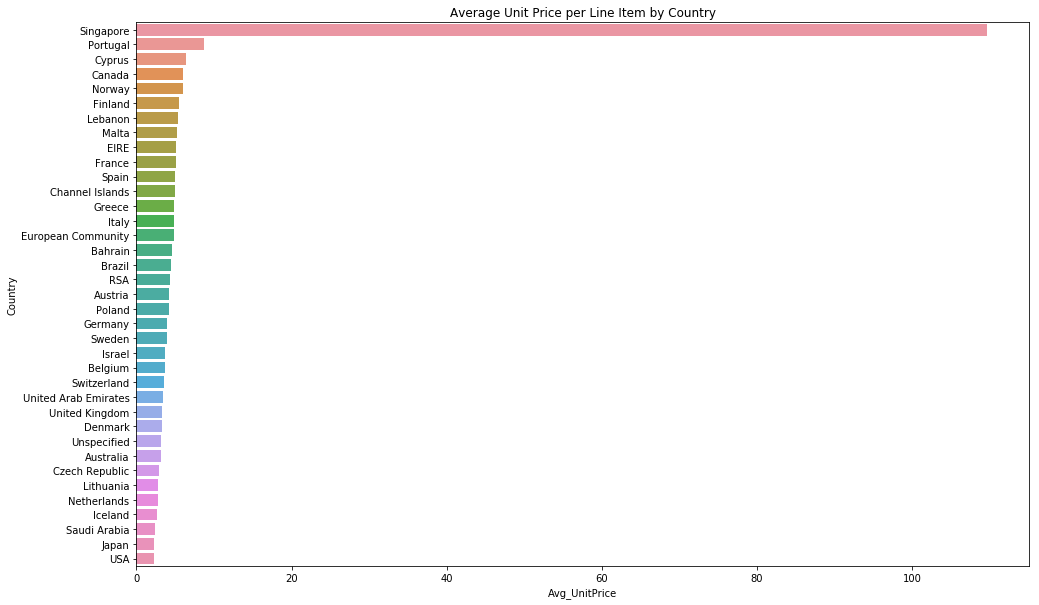

,Avg_UnitPrice,Country
29,109.645808,Singapore
26,8.771754,Portugal
7,6.350311,Cyprus
5,6.030331,Canada
24,6.012026,Norway
12,5.448705,Finland
20,5.387556,Lebanon
22,5.244173,Malta
10,5.111607,EIRE
13,5.053124,France


In [27]:
count_by_country.sort_values(by=['Avg_UnitPrice'],ascending=False,inplace=True)
avg_price = count_by_country['Avg_UnitPrice']

country = count_by_country['Country']
plt.figure(figsize=(16,10))
plt.title('Average Unit Price per Line Item by Country')
plt.xlabel('Number of Customers')
total = float(len(count_by_country))
#ax.fig.set_size_inches(16,10)
sns.barplot(x=avg_price,y=country,orient='h')
plt.show()
display(count_by_country[['Avg_UnitPrice', 'Country']])

Singapore seems like it is an outlier in this area, buying a single item of a much higher price than any other country.  The table below explains this. There were four manual charges to what looks like 4 consecutive customers for some high priced item, and then the invoices were cancelled.  Since we decided earlier to leave cancelled items in the data set we will also leave this here and just note this outlier.

In [28]:
display (marketing_data.loc[(marketing_data['Country']=='Singapore')])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency
70758,542102,21519,GIN & TONIC DIET GREETING CARD,72,2011-01-25 13:26:00,0.36,12744.0,Singapore,25.92,317.0
70759,542102,22697,GREEN REGENCY TEACUP AND SAUCER,6,2011-01-25 13:26:00,2.95,12744.0,Singapore,17.70,317.0
70760,542102,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-01-25 13:26:00,2.95,12744.0,Singapore,17.70,317.0
70761,542102,22343,PARTY PIZZA DISH RED RETROSPOT,24,2011-01-25 13:26:00,0.21,12744.0,Singapore,5.04,317.0
70762,542102,22344,PARTY PIZZA DISH PINK POLKADOT,24,2011-01-25 13:26:00,0.21,12744.0,Singapore,5.04,317.0
70763,542102,22345,PARTY PIZZA DISH BLUE POLKADOT,24,2011-01-25 13:26:00,0.21,12744.0,Singapore,5.04,317.0
70764,542102,22346,PARTY PIZZA DISH GREEN POLKADOT,24,2011-01-25 13:26:00,0.21,12744.0,Singapore,5.04,317.0
70765,542102,22960,JAM MAKING SET WITH JARS,12,2011-01-25 13:26:00,3.75,12744.0,Singapore,45.00,317.0
70766,542102,22969,HOMEMADE JAM SCENTED CANDLES,24,2011-01-25 13:26:00,1.45,12744.0,Singapore,34.80,317.0
70767,542102,20971,PINK BLUE FELT CRAFT TRINKET BOX,48,2011-01-25 13:26:00,1.25,12744.0,Singapore,60.00,317.0


The table below is showing which country has the highest average Total Line Item Price.  The order in this list in similar to the average number of line items table above. It makes sense that the country that buy the most of a single item will also have the most amount of money spent on a single item. We can take note the outlier found above for Singapore may affect their standing in this chart.  The outlier was previously noted.

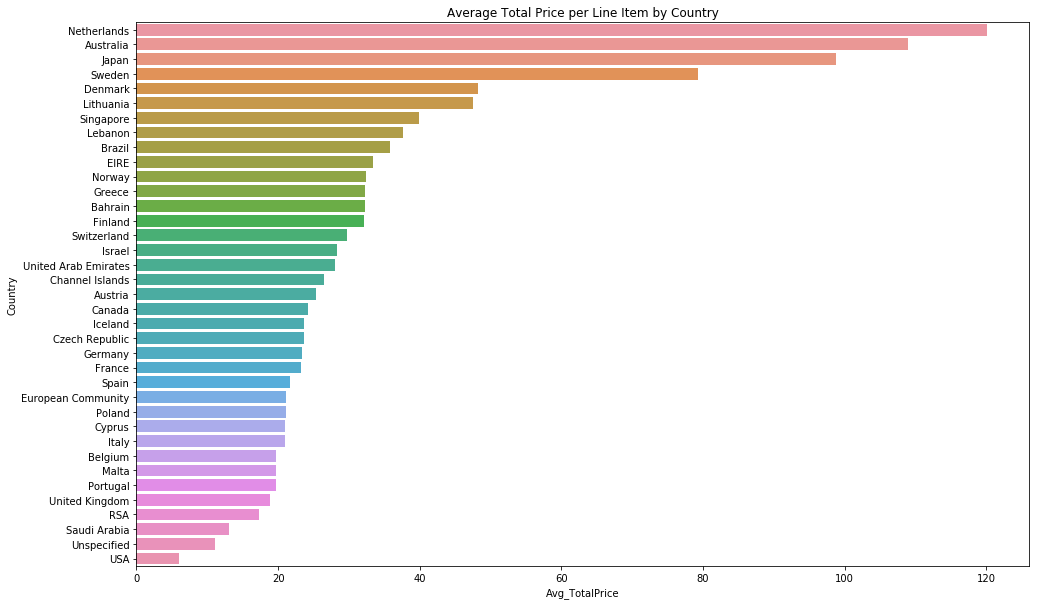

,Avg_TotalPrice,Country
23,120.059696,Netherlands
0,108.910787,Australia
19,98.716816,Japan
31,79.360976,Sweden
9,48.247147,Denmark
21,47.458857,Lithuania
29,39.827031,Singapore
20,37.641778,Lebanon
4,35.737500,Brazil
10,33.445054,EIRE


In [29]:
count_by_country.sort_values(by=['Avg_TotalPrice'],ascending=False,inplace=True)
avg_sale = count_by_country['Avg_TotalPrice']

country = count_by_country['Country']
plt.figure(figsize=(16,10))
plt.title('Average Total Price per Line Item by Country')
plt.xlabel('Number of Customers')
#ax.fig.set_size_inches(15,15)
sns.barplot(x=avg_sale,y=country,orient='h')
plt.show()
display(count_by_country[['Avg_TotalPrice', 'Country']])

Here we examine each transaction's Total Price  by country, looking for outliers.  Since Total Price is a combination of Quantity and Unit Price, we will be able to check both of these features with this chart.

,Quantity,UnitPrice,CustomerID,TotalPrice,Recency
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638,151.499186
std,250.283037,69.764035,1714.006089,430.352218,112.722740
min,-80995.000000,0.000000,12346.000000,-168469.600000,0.000000
25%,2.000000,1.250000,13939.000000,4.250000,50.000000
50%,5.000000,1.950000,15145.000000,11.700000,132.000000
75%,12.000000,3.750000,16784.000000,19.800000,246.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,373.000000


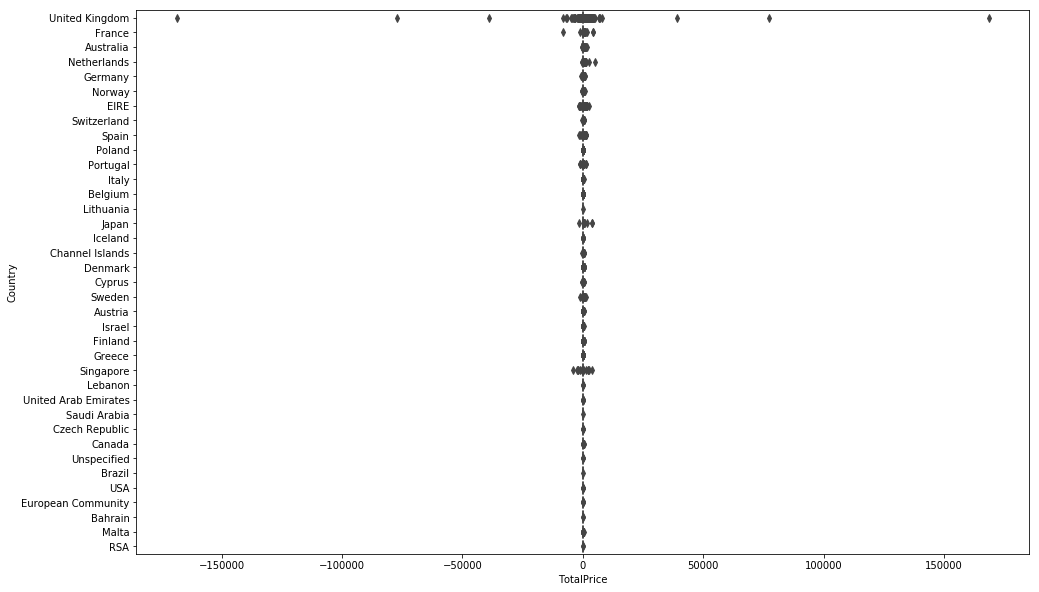

In [30]:
marketing_data['TotalPrice'] = marketing_data['UnitPrice'] *  marketing_data['Quantity']
plt.figure(figsize=(16,10))
sns.boxplot(x='TotalPrice', y='Country', data=marketing_data, orient='h')
display (marketing_data.describe())

The graph above is not very granular, however we can see some outliers from the United Kingdom.  The outlier seem to be symetric so we need to examine these.  The outliers appear to all be above 3500 and below -$3500.  Below we look for the transactions that meet this criteria.

In [31]:
min_sales = marketing_data.loc[(marketing_data['TotalPrice'] < -35000)]
max_sales = marketing_data.loc[(marketing_data['TotalPrice'] > 35000)]

display(min_sales)
display(max_sales)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,325.0
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.0,181.0
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6,0.0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,325.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.0,181.0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,0.0


The Invoice numbers for all the high value negative transactions have a 'C' at the beginning.  We can speculate these are cancelled orders.  The Stock codes for two of the three matching transactions also match.  This is further proof these are not mistakes, but actual orders that were cancelled.  We will retain them in the data set.

## Grouping Values by Invoice Number

Here we want to collect all the relevant information for each unique invoice.  Invoices are spread all over the data set since each row represents a single line item in a unique invoice.

This data set gropus by InvoiceNo which results in having one row representing one unique invoice, total transaction value of that invoice, customer, country, invoice date, total quantity and descriptions plus all other information related to the invoice. 


In [32]:
by_invoice = marketing_data.groupby(['InvoiceNo', 'InvoiceDate','Country','CustomerID', 'Recency'], as_index=False)[ 'UnitPrice','Description','Quantity','TotalPrice'].agg(lambda x: list(x))
by_invoice['TotalPrice'] = by_invoice['TotalPrice'].apply(sum)
by_invoice['QuantityTotal'] = by_invoice['Quantity'].apply(sum)
by_invoice['Description_as_string'] = by_invoice['Description'].apply(lambda x: "-".join(sorted(x)))


In [33]:
by_invoice.head()

,InvoiceNo,InvoiceDate,Country,CustomerID,Recency,UnitPrice,Description,Quantity,TotalPrice,QuantityTotal,Description_as_string
0,536365,2010-12-01 08:26:00,United Kingdom,17850.0,373.0,"[2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25]","[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...","[6, 6, 8, 6, 6, 2, 6]",139.12,40,CREAM CUPID HEARTS COAT HANGER-GLASS STAR FROS...
1,536366,2010-12-01 08:28:00,United Kingdom,17850.0,373.0,"[1.85, 1.85]","[HAND WARMER UNION JACK, HAND WARMER RED POLKA...","[6, 6]",22.20,12,HAND WARMER RED POLKA DOT-HAND WARMER UNION JACK
2,536367,2010-12-01 08:34:00,United Kingdom,13047.0,373.0,"[1.69, 2.1, 2.1, 3.75, 1.65, 4.25, 4.95, 9.95,...","[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...","[32, 6, 6, 8, 6, 6, 3, 2, 3, 3, 4, 4]",278.73,83,ASSORTED COLOUR BIRD ORNAMENT-BOX OF 6 ASSORTE...
3,536368,2010-12-01 08:34:00,United Kingdom,13047.0,373.0,"[4.25, 4.95, 4.95, 4.95]","[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...","[6, 3, 3, 3]",70.05,15,BLUE COAT RACK PARIS FASHION-JAM MAKING SET WI...
4,536369,2010-12-01 08:35:00,United Kingdom,13047.0,373.0,[5.95],[BATH BUILDING BLOCK WORD],[3],17.85,3,BATH BUILDING BLOCK WORD


This chart below is showing us which country spends the most money on average on each invoice.  It is not surprising to see the Netherlands leading this chart as this country was at the top of Average Price per Line Item and the Average Number of Items per Line Item lists.

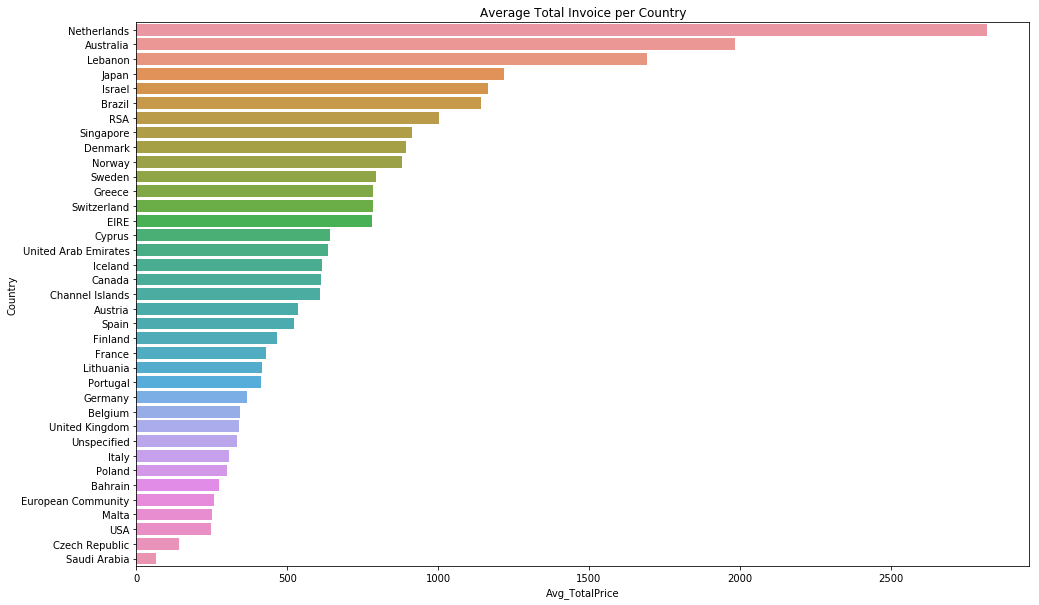

,Avg_TotalPrice,Country
23,120.059696,Netherlands
0,108.910787,Australia
19,98.716816,Japan
31,79.360976,Sweden
9,48.247147,Denmark
21,47.458857,Lithuania
29,39.827031,Singapore
20,37.641778,Lebanon
4,35.737500,Brazil
10,33.445054,EIRE


In [34]:
invoice_by_country = by_invoice.groupby(['Country']).count()
invoice_by_country['Avg_TotalPrice'] = by_invoice.groupby(['Country'])['TotalPrice'].mean()

invoice_by_country.reset_index(level=0, inplace=True)
invoice_by_country.sort_values(by=['Avg_TotalPrice'],ascending=False,inplace=True)


avg_invoice = invoice_by_country['Avg_TotalPrice']
country = invoice_by_country['Country']
plt.figure(figsize=(16,10))
plt.title('Average Total Invoice per Country')
plt.xlabel('Number of Customers')
sns.barplot(x=avg_invoice,y=country,orient='h')
plt.show()
display(count_by_country[['Avg_TotalPrice', 'Country']])

## Grouping Values by Customer ID

Here our research is based on customers, therefore it is useful to group our dataset by Customer ID and create two other new features (Frequency and Monetary) for each customer from there.

In [35]:
by_customer = by_invoice.groupby(['CustomerID'], as_index=False)['InvoiceNo', 'InvoiceDate', 'Recency', 'Description','Quantity','TotalPrice'].agg(lambda x: list(x))

by_customer['Frequency'] = by_customer['InvoiceNo'].apply(lambda x: len(x))
by_customer['Monetary'] = by_customer['TotalPrice'].apply(sum)
by_customer['Recency'] = by_customer['Recency'].apply(min)
by_customer['Quantity'] = by_customer['Quantity'].apply(lambda x: sum(x,[]))
by_customer['QuantityTotal'] = by_customer['Quantity'].apply(sum)
#by_customer['Description_joined'] = by_customer['Description'].apply(lambda x: "-".join(sorted(x[0])))



In [36]:
by_customer.head()


,CustomerID,InvoiceNo,InvoiceDate,Recency,Description,Quantity,TotalPrice,Frequency,Monetary,QuantityTotal
0,12346.0,"[541431, C541433]","[2011-01-18 10:01:00, 2011-01-18 10:17:00]",325.0,"[[MEDIUM CERAMIC TOP STORAGE JAR], [MEDIUM CER...","[74215, -74215]","[77183.6, -77183.6]",2,0.00,0
1,12347.0,"[537626, 542237, 549222, 556201, 562032, 57351...","[2010-12-07 14:57:00, 2011-01-26 14:30:00, 201...",1.0,"[[BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG...","[12, 4, 12, 36, 12, 12, 12, 12, 12, 12, 4, 4, ...","[711.79, 475.39, 636.25, 382.52, 584.91, 1294....",7,4310.00,2458
2,12348.0,"[539318, 541998, 548955, 568172]","[2010-12-16 19:09:00, 2011-01-25 10:42:00, 201...",74.0,"[[72 SWEETHEART FAIRY CAKE CASES, 60 CAKE CASE...","[72, 72, 24, 120, 24, 120, 72, 144, 144, 48, 7...","[892.8000000000001, 227.43999999999997, 367.0,...",4,1797.24,2341
3,12349.0,[577609],[2011-11-21 09:51:00],18.0,"[[PARISIENNE CURIO CABINET, SWEETHEART WALL TI...","[2, 2, 6, 3, 6, 6, 12, 2, 12, 2, 12, 12, 6, 3,...",[1757.55],1,1757.55,631
4,12350.0,[543037],[2011-02-02 16:01:00],309.0,"[[CHOCOLATE THIS WAY METAL SIGN, METAL SIGN NE...","[12, 12, 10, 12, 24, 6, 12, 12, 12, 12, 12, 12...",[334.40000000000003],1,334.40,197


Next we examine the distribution of the Frequency and Recency features we created. The Recency of people purchasing from us is on average just under 100 days.  The Frequency, which shows how often people buy, reveals we have quite a few good customers, with at least one customer buying from us 249 times.  Further research to identify these high repeat customers would something to do in the future.

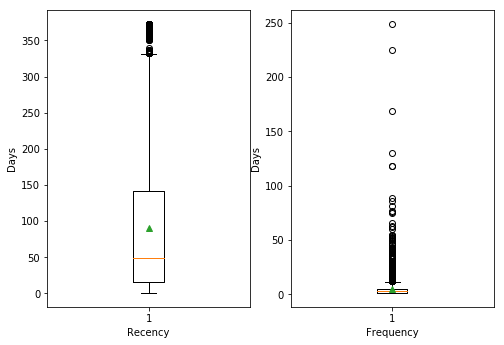

count    4372.000000
mean       91.047118
std       100.765435
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

count    4372.000000
mean        5.082571
std         9.361120
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       249.000000
Name: Frequency, dtype: float64

In [37]:
desc_rec = by_customer['Recency'].describe()
desc_freq = by_customer['Frequency'].describe()
list_of_desc = [desc_rec, desc_freq]
fig = plt.figure(figsize=(8,12))
sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('Recency')
sub1.set_ylabel('Days')
sub1.boxplot(by_customer['Recency'],showmeans=True,)
sub2 = fig.add_subplot(2,2,2)
sub2.set_xlabel('Frequency')
sub2.set_ylabel('Days')
sub2.boxplot(by_customer['Frequency'],showmeans=True)
plt.show()
#sub3 = fig.add_subplot(2,2,3)
#ub3.plot.table(desc_rec)
display (desc_rec)
display (desc_freq)

### Classify Transaction type

In [38]:
by_invoice['Transaction']=''

for index,row in by_invoice.iterrows():
    if str(row['InvoiceNo']).startswith("C"):
        by_invoice.loc[index,'Transaction'] = 'Cancel'
    elif str(row['InvoiceNo']).startswith("A"):
        by_invoice.loc[index,'Transaction'] = 'Adjust'
    else:
        by_invoice.loc[index,'Transaction'] = 'Purchase'


In [39]:
by_invoice.sample(10)

,InvoiceNo,InvoiceDate,Country,CustomerID,Recency,UnitPrice,Description,Quantity,TotalPrice,QuantityTotal,Description_as_string,Transaction
3609,545698,2011-03-06 14:44:00,United Kingdom,15572.0,277.0,"[1.95, 1.95, 1.65, 1.49, 1.25, 1.65, 1.45, 1.4...","[JUMBO BAG WOODLAND ANIMALS, JUMBO BAG DOLLY G...","[1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1]",225.14,19,ENAMEL FLOWER JUG CREAM-HANGING CHICK YELLOW ...,Purchase
4820,548740,2011-04-04 11:34:00,United Kingdom,13319.0,249.0,"[4.95, 1.25, 12.75, 2.08, 2.95, 5.95, 2.95, 2....","[PARTY BUNTING, VICTORIAN GLASS HANGING T-LIGH...","[12, 12, 3, 10, 6, 6, 6, 6, 6, 6, 8, 10, 10, 1...",599.84,216,ALARM CLOCK BAKELIKE CHOCOLATE-ALARM CLOCK BAK...,Purchase
13929,570836,2011-10-12 13:55:00,United Kingdom,17410.0,57.0,"[0.65, 0.65, 16.95, 3.25, 1.45, 1.25, 2.55, 1....","[12 PENCILS SMALL TUBE SKULL, SET 12 COLOURING...","[24, 16, 2, 6, 12, 12, 12, 12, 2, 2, 2, 12, 12...",449.15,203,12 PENCILS SMALL TUBE SKULL-BUNDLE OF 3 ALPHAB...,Purchase
3754,546116,2011-03-09 13:53:00,United Kingdom,15367.0,274.0,"[1.95, 5.95, 1.25, 2.55, 4.95, 3.95, 1.25, 3.7...","[PINK FAIRY CAKE CHILDRENS APRON, TEA TIME KIT...","[8, 6, 10, 6, 6, 4, 12, 6, 12, 24, 24, 24, 24,...",764.58,412,60 TEATIME FAIRY CAKE CASES-ANTIQUE SILVER TEA...,Purchase
7007,554076,2011-05-22 11:30:00,United Kingdom,16556.0,201.0,"[1.65, 3.75, 8.5, 4.95, 0.42, 0.42, 12.5, 8.25...","[LARGE CERAMIC TOP STORAGE JAR, FOOD COVER WIT...","[12, 6, 2, 3, 12, 12, 1, 2, 24, 4, 12, 12, 3, ...",369.76,210,6 RIBBONS RUSTIC CHARM-ALUMINIUM STAMPED HEART...,Purchase
17330,578690,2011-11-25 09:36:00,United Kingdom,17302.0,14.0,"[2.95, 0.85, 2.95, 1.65, 1.25, 1.65, 3.75, 2.9...","[LARGE WHITE HEART OF WICKER, HEART DECORATION...","[1, 1, 2, 1, 2, 2, 24, 2, 6]",138.55,41,3 HEARTS HANGING DECORATION RUSTIC-GREY HEART ...,Purchase
14690,572726,2011-10-25 15:19:00,United Kingdom,16056.0,44.0,"[9.95, 6.95, 2.55, 0.85, 2.95, 12.75, 3.75, 0....","[NOVELTY BISCUITS CAKE STAND 3 TIER, WOOD 2 DR...","[1, 2, 6, 48, 6, 2, 6, 6, 6, 12, 2, 3, 12, 2, ...",650.75,345,10 COLOUR SPACEBOY PEN-3 DRAWER ANTIQUE WHITE ...,Purchase
5216,549902,2011-04-12 16:17:00,United Kingdom,14006.0,240.0,"[2.95, 4.95, 1.45, 15.95, 5.95, 3.95, 1.25, 1....","[PAPER BUNTING WHITE LACE, PARTY BUNTING, LUNC...","[6, 4, 100, 1, 6, 4, 12, 12, 12, 24, 10, 10, 10]",357.65,211,60 CAKE CASES DOLLY GIRL DESIGN-ENAMEL FLOWER ...,Purchase
7900,556256,2011-06-09 17:37:00,United Kingdom,14309.0,182.0,"[1.45, 1.25, 2.08, 0.12, 0.12, 1.65, 0.42, 0.6...","[HOMEMADE JAM SCENTED CANDLES, SET OF 4 PANTRY...","[24, 12, 6, 24, 24, 12, 12, 12, 12, 12, 6, 6, ...",196.68,198,BLOSSOM IMAGES GIFT WRAP SET-BLUE EGG SPOON-C...,Purchase
11397,564851,2011-08-30 16:53:00,United Kingdom,13183.0,100.0,"[0.42, 2.95, 7.95, 1.65, 0.65, 0.65, 0.65, 0.6...","[WRAP VINTAGE DOILY , METAL 4 HOOK HANGER FRE...","[25, 3, 3, 4, 8, 2, 5, 4, 24, 24, 25, 18, 1, 4...",211.96,174,ASS FLORAL PRINT MULTI SCREWDRIVER-BLUE HEART ...,Purchase


Now create a word cloud from the Descriptions feature of the data set.  This will highlight the most common words found in each line item of descriptions of the order.  Alarm, Clock, Bakelike, Red and Children are some of the most common words in the description field. 

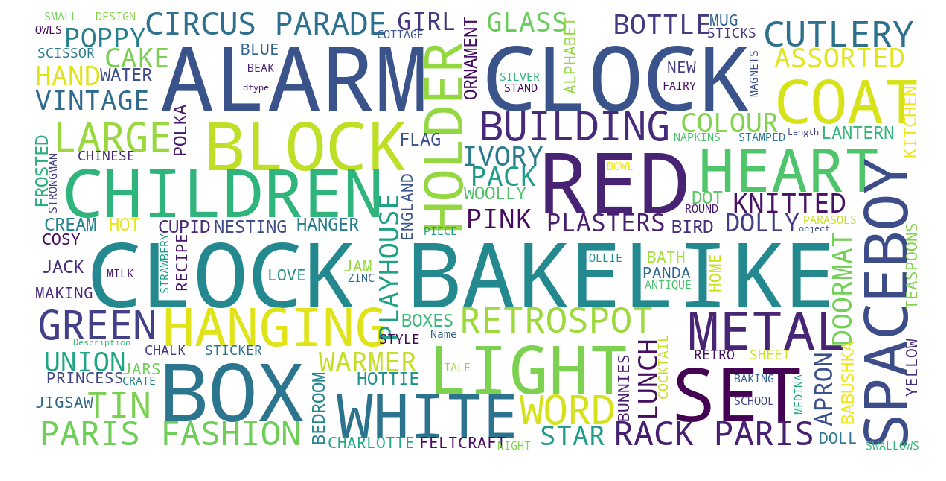

In [40]:
# Code from stackoverflow: https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(marketing_data['Description'])

# Modeling and Evaluation

### Cluster Analysis --K Means on RFM Customer Behavior

What is an RFM models and why use it? 

RFM stands for Recency, Frequency, & Monetary Model which is a classic business tool that’s benefited the marketing and sales departments of high customer volume companies. The basic question proposed in these departments is: Who is your “best” customer. And here lies the problem of determining which customers qualify as “best” since it’s such a subjective word. Some businesses value loyalty over high sales since they believe consistency and predictability is best for them. Others believe only in high volume sales even if it was seasonal, and so on. 

The RFM Model comes from a variation of previous models that attempt to segment the business’s customer base or potential customer base quantitatively using the three variables scoring methodology. This might seem intuitive, but as we discuss in the Deployment Section, it’s not often implemented as we’d think.  

Further examination from the predictive analytics software company, Canopy Labs excerpt: 

1) Recency: When was the last time a customer made a purchase order with your business? According to the RFM model, a customer who has recently interacted with your store is more inclined to accept another interaction that you initiate.

2) Frequency: How regularly does this customer make a purchase with your business? Over time, the frequency of a purchase can, in most cases, predict the likelihood and schedule of future purchases.

3) Monetary Value: How much money does this customer spend over a period of time? Depending on what makes more sense for your company, you might decide to calculate monetary value as revenue or profitability. Either way, this input adds monetary spend into the equation to calculate your RFM.

Source: https://canopylabs.com/resources/an-introduction-to-the-rfm-model/ 

Coding Source: https://towardsdatascience.com/find-your-best-customers-with-customer-segmentation-in-python-61d602f9eee6 

In [41]:
#Dataset used with new appended fields
#Dataset accounts for cancelled orders. 
by_customer.head() 


,CustomerID,InvoiceNo,InvoiceDate,Recency,Description,Quantity,TotalPrice,Frequency,Monetary,QuantityTotal
0,12346.0,"[541431, C541433]","[2011-01-18 10:01:00, 2011-01-18 10:17:00]",325.0,"[[MEDIUM CERAMIC TOP STORAGE JAR], [MEDIUM CER...","[74215, -74215]","[77183.6, -77183.6]",2,0.00,0
1,12347.0,"[537626, 542237, 549222, 556201, 562032, 57351...","[2010-12-07 14:57:00, 2011-01-26 14:30:00, 201...",1.0,"[[BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG...","[12, 4, 12, 36, 12, 12, 12, 12, 12, 12, 4, 4, ...","[711.79, 475.39, 636.25, 382.52, 584.91, 1294....",7,4310.00,2458
2,12348.0,"[539318, 541998, 548955, 568172]","[2010-12-16 19:09:00, 2011-01-25 10:42:00, 201...",74.0,"[[72 SWEETHEART FAIRY CAKE CASES, 60 CAKE CASE...","[72, 72, 24, 120, 24, 120, 72, 144, 144, 48, 7...","[892.8000000000001, 227.43999999999997, 367.0,...",4,1797.24,2341
3,12349.0,[577609],[2011-11-21 09:51:00],18.0,"[[PARISIENNE CURIO CABINET, SWEETHEART WALL TI...","[2, 2, 6, 3, 6, 6, 12, 2, 12, 2, 12, 12, 6, 3,...",[1757.55],1,1757.55,631
4,12350.0,[543037],[2011-02-02 16:01:00],309.0,"[[CHOCOLATE THIS WAY METAL SIGN, METAL SIGN NE...","[12, 12, 10, 12, 24, 6, 12, 12, 12, 12, 12, 12...",[334.40000000000003],1,334.40,197


In [42]:
# Duplicated the dataframe to avoid accidental manipulation. 
maa = by_customer.copy()

#Isolated the variables that are relevant to the analysis
mad = maa[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
mad.set_index('CustomerID',inplace=True)

mad.head()



#mad.to_excel('C:/Users/Bahr/Desktop/dakas.xlsx')  #Testing dataset accuracy 

#maa.to_excel('C:/Users/Bahr/Desktop/dakasss.xlsx')  #Testing dataset accuracy 

#The following table is an RFM table 

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325.0,2,0.00
12347.0,1.0,7,4310.00
12348.0,74.0,4,1797.24
12349.0,18.0,1,1757.55
12350.0,309.0,1,334.40


In [43]:
#Create customer segments from RFM model using Quartiles 
#Here we want to create an RFM score for each customer to easily identify the customer's behavior. 
#The score is from 1-4 but can be 1-5, etc. 

quant = mad.quantile(q=[0.25,0.5,0.75])
quant

,Recency,Frequency,Monetary
0.25,16.0,1.0,291.795
0.50,49.0,3.0,644.070
0.75,142.0,5.0,1608.335


In [44]:
quant.to_dict()

{'Recency': {0.25: 16.0, 0.5: 49.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Monetary': {0.25: 291.79499999999996,
  0.5: 644.0699999999999,
  0.75: 1608.335}}

In [45]:
#Here we are creating the RFM segmentation rankings. 
#The score is from 1-4 but can be 1-5, etc. 
#A rank of 4 will be the highest/best. A rank of 1 will be the worst/lowest. 
#We have two arguments because in case of recency, the lower the number (days) the better.



#Arguments (x= value, p = recency, monetary_value, frequency, d = quartiles dict)
def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

#Arguments (x= value, p = recency, monetary_value, frequency, d = quartiles dict)  
def FMscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [46]:

#Create RFM segmentation table
segmentation = mad.copy()
segmentation['R_Quartile'] = segmentation['Recency'].apply(Rscore, args=('Recency',quant))
segmentation['F_Quartile'] = segmentation['Frequency'].apply(FMscore, args=('Frequency',quant))
segmentation['M_Quartile'] = segmentation['Monetary'].apply(FMscore, args=('Monetary',quant))
print(segmentation[segmentation['Frequency'].isna()])


Empty DataFrame
Columns: [Recency, Frequency, Monetary, R_Quartile, F_Quartile, M_Quartile]
Index: []


Now each customer is assigned in a quartile. 

In [47]:
segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325.0,2,0.00,1,2,1
12347.0,1.0,7,4310.00,4,4,4
12348.0,74.0,4,1797.24,2,3,4
12349.0,18.0,1,1757.55,3,1,4
12350.0,309.0,1,334.40,1,1,2


In [48]:
#adding RFM score for each customer

segmentation['RFM_Score'] = segmentation.R_Quartile.map(str) \
                            + segmentation.F_Quartile.map(str) \
                            + segmentation.M_Quartile.map(str)
segmentation.head()

print(segmentation[segmentation['Frequency'].isna()])

Empty DataFrame
Columns: [Recency, Frequency, Monetary, R_Quartile, F_Quartile, M_Quartile, RFM_Score]
Index: []


In [49]:
#Filtering for the "best" Customers.

segmentation[segmentation['RFM_Score']=='444'].head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,
12347.0,1.0,7,4310.00,4,4,4,444
12359.0,7.0,6,6182.98,4,4,4,444
12362.0,2.0,13,5154.58,4,4,4,444
12381.0,4.0,6,1803.96,4,4,4,444
12388.0,15.0,6,2780.66,4,4,4,444
12395.0,15.0,15,2998.28,4,4,4,444
12417.0,2.0,12,3578.80,4,4,4,444
12423.0,0.0,9,1849.11,4,4,4,444
12433.0,0.0,7,13375.87,4,4,4,444


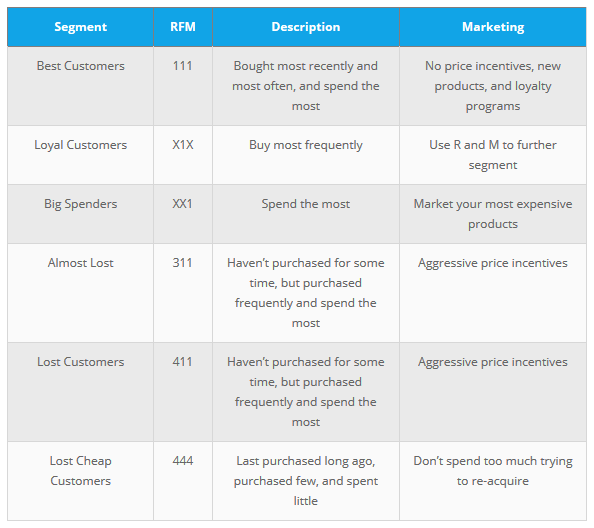

In [50]:
#Here we will assign the scores the appropriate segments and quantify customers that fall in those groups. 

display(Image('https://i.imgur.com/vEUDYTc.png', width=700, unconfined=True))

#Source: https://www.blastam.com/blog/rfm-analysis-boosts-sales

Earlier we suggested that a score of 4 was the best in each feature. This is because some analysts add the score from the three features and rank the customers based on the total. Example: a total score of 12 ranks the customers the highest. This simplification is made for the sales field people who don’t want to drill down into the data. In the chart above, the best customers have the lowest total score but in this case, their purpose wasn’t to add up the score. Their intention is to use a 3 digit representation as a score. We will stick with the "444" as representing the best customer. 

In [51]:
#Manual assigning of customer groups trial 1. 

print("Best Customers: ",len(segmentation[segmentation['RFM_Score']=='444']))
print('Loyal Customers: ',len(segmentation[segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(segmentation[segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(segmentation[segmentation['RFM_Score']=='244']))
print('Lost Customers: ',len(segmentation[segmentation['RFM_Score']=='144']))
print('Lost Cheap Customers: ',len(segmentation[segmentation['RFM_Score']=='111']))



Best Customers:  496
Loyal Customers:  1089
Big Spenders:  1093
Almost Lost:  91
Lost Customers:  15
Lost Cheap Customers:  404


In [52]:
#Manual assigning of customer groups trial 2.

print("Best Customers: ",len(segmentation[segmentation['RFM_Score']=='444']))
print('Growth Customers: ', len(segmentation[segmentation['RFM_Score']=='333']))
print('Tipping point Customers: ',len(segmentation[segmentation['RFM_Score']=='222']))
print('Lost Customers: ',len(segmentation[segmentation['RFM_Score']=='111']))

Best Customers:  496
Growth Customers:  120
Tipping point Customers:  146
Lost Customers:  404


In [53]:
#Manual assigning of customer groups trial 3. 

upper_list = ['444','433','434','333','344','343','443','334']
lower_list = ['222','211','212','111','122','121','112','221']


#len([k for k in temp if segmentation['RFM_Score'] in k])

print("Valued Customers: ",len( segmentation[segmentation['RFM_Score'].isin(upper_list) ])) 
print('Normal Customers: ',len(segmentation[segmentation['RFM_Score'].isin(lower_list)])) 

Valued Customers:  1227
Normal Customers:  1383


In [54]:
#Using K-Means Clustering on RFM Variables
#Create new dataframe to avoid complications. 

rfm_data = segmentation.drop(['R_Quartile','F_Quartile','M_Quartile','RFM_Score'],axis=1)
rfm_data.head()
print(rfm_data[rfm_data['Frequency'].isna()])

Empty DataFrame
Columns: [Recency, Frequency, Monetary]
Index: []


In [55]:
rfm_data.corr() #Feature Correlations

,Recency,Frequency,Monetary
Recency,1.000000,-0.259103,-0.131704
Frequency,-0.259103,1.000000,0.565034
Monetary,-0.131704,0.565034,1.000000


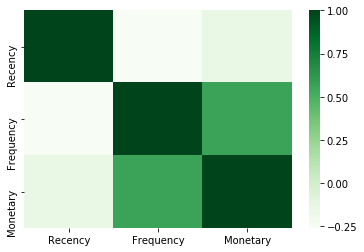

In [56]:
#From the heatmap and from the above feature correlation numbers we see that Frequency and Monetary are correlated best. 
#We will explore this relationship. 

sns.heatmap(rfm_data.corr(),cmap="Greens");


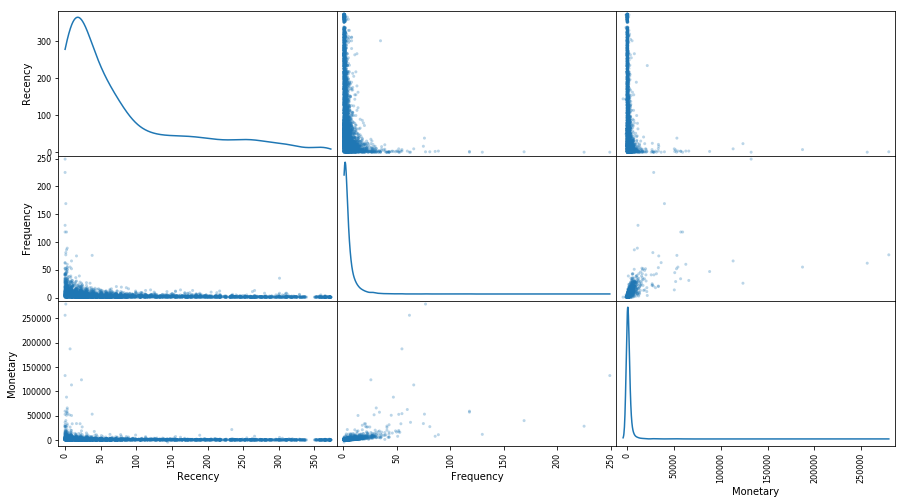

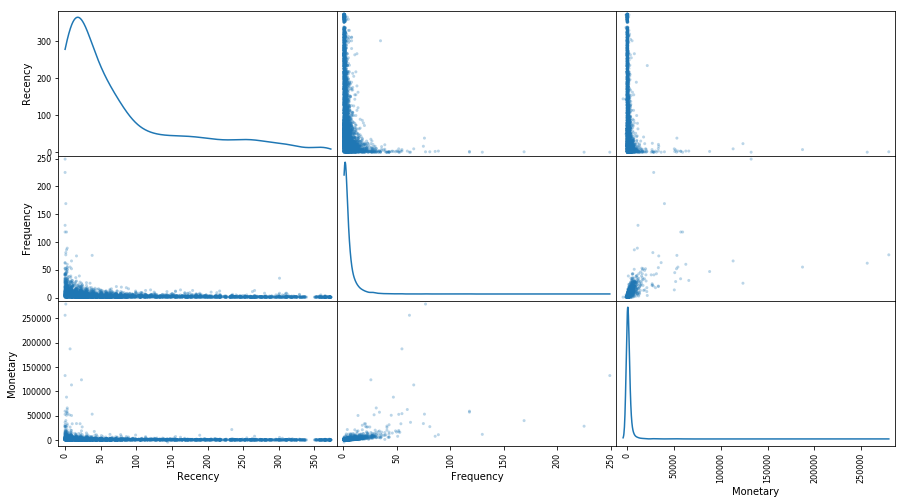

In [57]:
#Visualizing Feature Distributions
#From the visualization, we see that the variables are skewed thus we need to normalize.  


scatter_matrix(mad, alpha = 0.3, figsize = (15,8), diagonal = 'kde')
scatter_matrix(rfm_data, alpha = 0.3, figsize = (15,8), diagonal = 'kde');

In [58]:
#Data normalization using log. 
#Here we had a slight problem with NAN values. We replaced NAN with Mean. 

rfm_r_log = np.log(rfm_data['Recency']+.01) 
rfm_f_log = np.log(rfm_data['Frequency']+.01)
rfm_m_log = np.log(rfm_data['Monetary']+.01)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [59]:
log_data = pd.DataFrame({'Monetary': rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,-4.605170,5.783856,0.698135
12347.0,8.368696,0.009950,1.947338
12348.0,7.494013,4.304200,1.388791
12349.0,7.471682,2.890927,0.009950
12350.0,5.812368,5.733374,0.009950


In [60]:
#Created another data frame to test NAN and infinity issues. 

test = log_data

test = test.fillna(test.mean())

test.head()



,Monetary,Recency,Frequency
CustomerID,,,
12346.0,-4.605170,5.783856,0.698135
12347.0,8.368696,0.009950,1.947338
12348.0,7.494013,4.304200,1.388791
12349.0,7.471682,2.890927,0.009950
12350.0,5.812368,5.733374,0.009950


In [61]:
np.any(np.isnan(test))

False

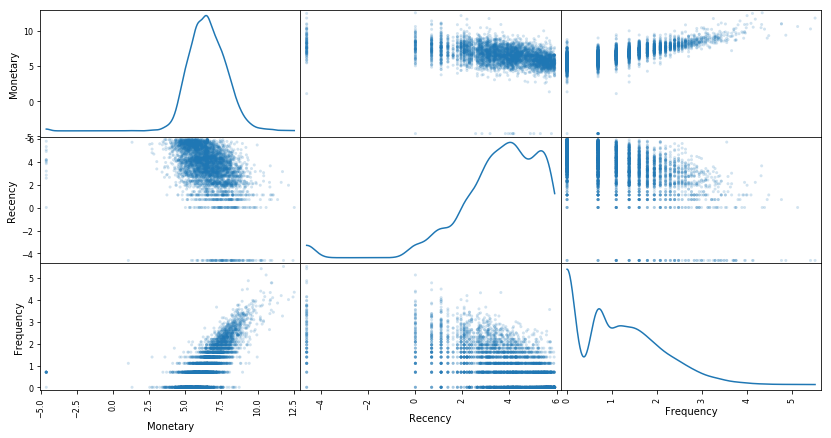

In [62]:
#Visualized result after normalization. Results look much less skewed. 

scatter_matrix(test, alpha = 0.2, figsize = (14,7), diagonal = 'kde');

In [63]:
test.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.411606,0.730376
Recency,-0.411606,1.000000,-0.531992
Frequency,0.730376,-0.531992,1.000000


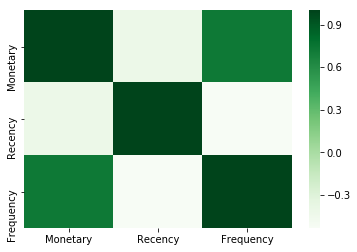

In [64]:
sns.heatmap(test.corr(),cmap="Greens");

Normalization have made the Monetary and Frequency even more correlated. 

## Silhouette test

In [65]:
#K-Means Implementation    ---best score is 2 clusters 

matrix = test.values
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.42281912129430405
For n_clusters = 3 The average silhouette_score is : 0.41611532436708487
For n_clusters = 4 The average silhouette_score is : 0.32070110830229115
For n_clusters = 5 The average silhouette_score is : 0.3386276470028391
For n_clusters = 6 The average silhouette_score is : 0.35074277337879867
For n_clusters = 7 The average silhouette_score is : 0.33301007316284986
For n_clusters = 8 The average silhouette_score is : 0.32047108267194274
For n_clusters = 9 The average silhouette_score is : 0.3163537985412278


In [66]:
n_clusters = 2 # we will use this initially to visualize low value (F) and high value customers
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('silhouette Score: {:<.3f}'.format(silhouette_avg))

silhouette Score: 0.423


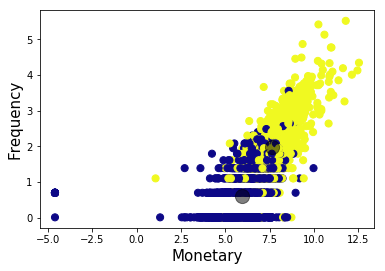

In [67]:
#create a scatter plot identifying high value and low value/average customers. 
plt.scatter(matrix[:, 0], matrix[:, 2], c=clusters_customers, s=50, cmap='plasma')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5)
plt.xlabel('Monetary', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [68]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['Number Customers']).T


,0,1
Number Customers,2910,1462


Overall the clustering of these two customer segments seems close to expected. Of course we'll see overlap due to the dynamic behavioral nature of customers. 

Next we will plot 6 customer groups to see what it looks like. 

In [69]:
n_clusters = 6  # 6 Clusters for potentially the 6 customer groups we've assigned earlier. 
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('silhouette score: {:<.3f}'.format(silhouette_avg))

silhouette score: 0.351


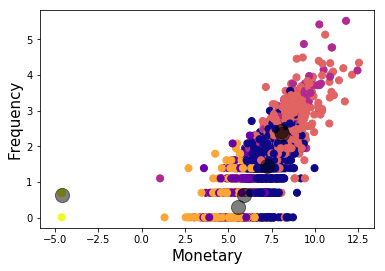

In [70]:
#create a scatter plot identifying customers in increasing value. 
plt.scatter(matrix[:, 0], matrix[:, 2], c=clusters_customers, s=50, cmap='plasma')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5)
plt.xlabel('Monetary', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [71]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['Number Customers']).T

,4,0,1,3,2,5
Number Customers,1506,1180,830,737,105,14


In [72]:
n_clusters = 4  # we will use 
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('silhouette Score: {:<.3f}'.format(silhouette_avg))

silhouette Score: 0.321


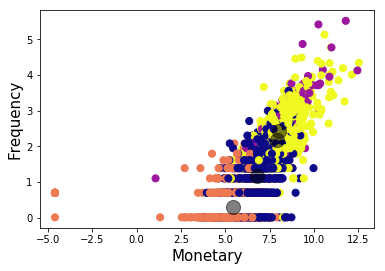

In [73]:
#create a scatter plot identifying customers in increasing value. 
plt.scatter(matrix[:, 0], matrix[:, 2], c=clusters_customers, s=50, cmap='plasma')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5)
plt.xlabel('Monetary', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [74]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['Number Customers']).T

,0,2,3,1
Number Customers,1737,1654,876,105


# 3D K-means Clustering

In [92]:
import plotly
import plotly.graph_objs as go
def getTrace(x, y, z, c, label, s=2):
    trace_points = go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(size=s, line=dict(color='rgb(0, 0, 0)', width=0.5), color=c, opacity=1),
    name=label)
    return trace_points;

In [93]:
def showGraph(title, x_colname, x_range, y_colname, y_range, z_colname, z_range, traces):
    layout = go.Layout(
    title=title,
    scene = dict(
    xaxis=dict(title=x_colname, range = x_range),
    yaxis=dict(title=y_colname, range = y_range),
    zaxis=dict(title=z_colname, range = z_range)
    )
    )
    
    figgg = go.Figure(data=traces, layout=layout)
    plotly.offline.plot(figgg)

In [94]:
#Coding Source: http://www.semspirit.com/artificial-intelligence/machine-learning/clustering/k-means-clustering/k-means-clustering-in-python/


from sklearn.cluster import KMeans
n_opt_clusters = 2
kmeans = KMeans( init = 'k-means++', n_clusters = n_opt_clusters, max_iter=1000, n_init = 30, random_state=0)
kmeans.fit(matrix)
y_kmeans = kmeans.predict(matrix)

In [95]:

#visualising the clusters
centroids = getTrace(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s= 25, c = 'yellow', label='Centroids')
t1 = getTrace(matrix[y_kmeans == 0, 0], matrix[y_kmeans == 0, 1], matrix[y_kmeans == 0, 2], s= 5, c='red', label = '0: Valued Customers')
t2 = getTrace(matrix[y_kmeans == 1, 0], matrix[y_kmeans == 1, 1], matrix[y_kmeans == 1, 2], s= 5, c='pink', label = '1: Average Customers') 
t3 = getTrace(matrix[y_kmeans == 2, 0], matrix[y_kmeans == 2, 1], matrix[y_kmeans == 2, 2], s= 5, c='blue', label = '2: ') 
t4 = getTrace(matrix[y_kmeans == 3, 0], matrix[y_kmeans == 3, 1], matrix[y_kmeans == 3, 2], s= 5, c='green', label = '3: ') 
t5 = getTrace(matrix[y_kmeans == 4, 0], matrix[y_kmeans == 4, 1], matrix[y_kmeans == 4, 2], s= 5, c='cyan', label = '4: ') 



x=matrix[:,0]
y=matrix[:,1]
z=matrix[:,2]
showGraph("Two Customer Segmentations", "Monetary", [min(x),max(x)], "Frequency", [min(y),max(y)], "Recency", [min(z)-1,max(z)], [t1,t2,t3,t4, t5, centroids])

Since the output is an HTML file, we have screenshot the plots. We will visualize segmentation based on 2, 3, and 5 centroids (previous 2ds plot showed 6 centriod/segments but we think that talking about 15 customers is not worth the squeeze.

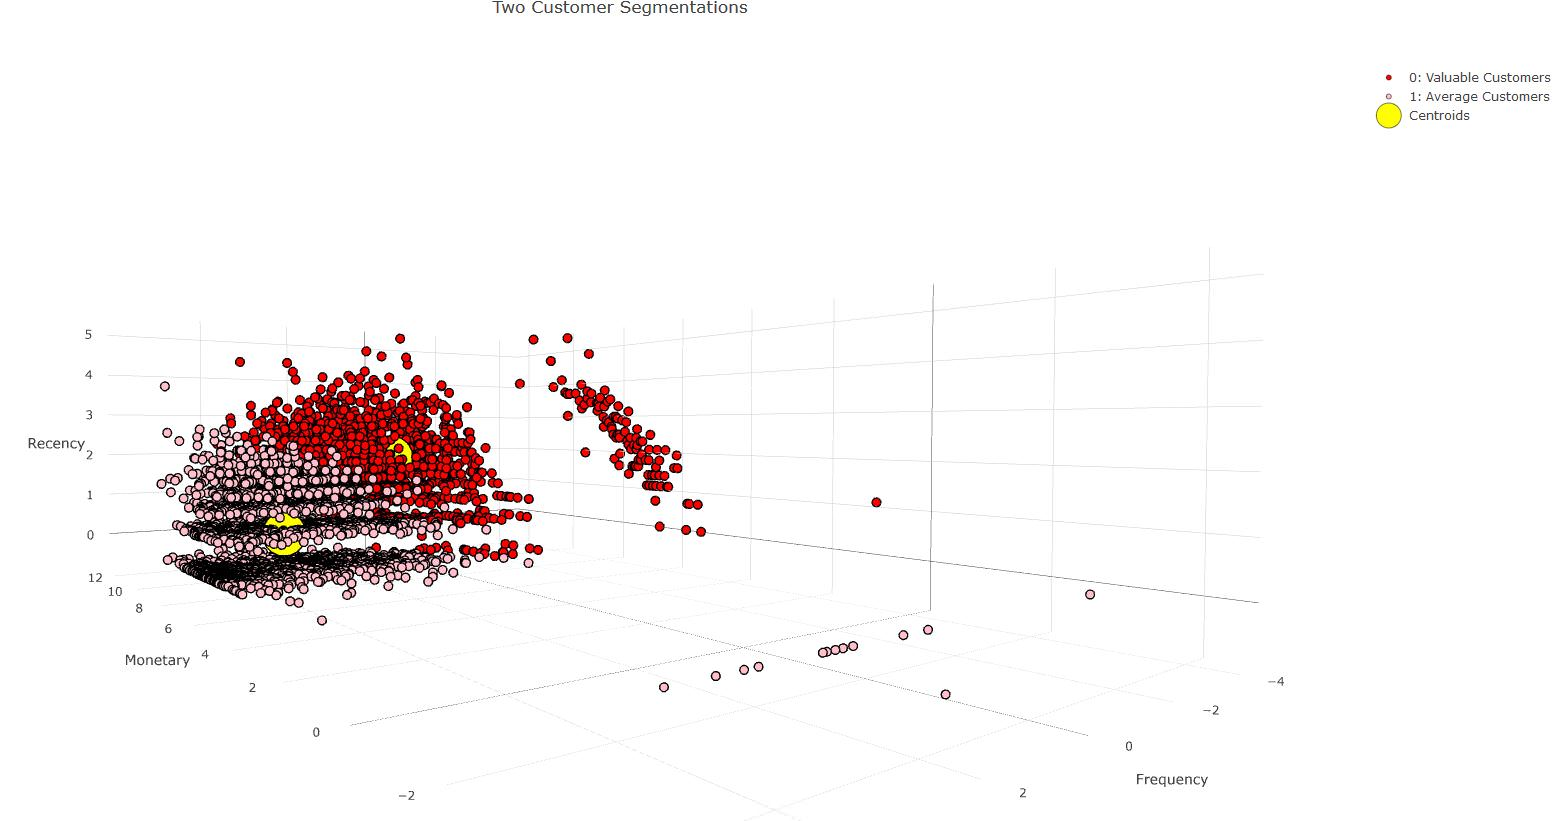

In [220]:
display(Image('https://i.imgur.com/PORUzFF.jpg', width=950, unconfined=True))

In [221]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(y_kmeans).value_counts(), columns = ['Number Customers']).T

,1,0
Number Customers,2910,1462


Ramifications: Having a subject matter expert in the group is definitely an advantage in analyzing these clusters. We started out with 2d plots of K-Means but were encouraged to get a more three dimensional looks at the clustering output due to a suspicion that it will greatly increase insight. And it did. Were we produced two clusters labeled Valued Customer and Average Customer. The reason we chose two clusters is because the Silhouette Score as the highest. However, as we see, there is a group on the right that visually doesn’t look like it belongs. 

Regardless, the numbers generated above identifying how many customers are in the first group and in the second group is  not exactly in line with our manual RFM assignment in Trial 3. There might be variability in that comparison since Trial 3 had a hard cut off between the Valuable customers and the Average customers. Hence, the manual assignment of customers in Trial 3 omitted the spectrum of customers in between which is strategic in identifying the strongest customers, but only that. We however feel that the clustering amount here does not provide as much insight as we’d like. Thus, we will increase the clusters moving forward. 


In [222]:
n_opt_clusters = 3
kmeans = KMeans( init = 'k-means++', n_clusters = n_opt_clusters, max_iter=1000, n_init = 30, random_state=0)
kmeans.fit(matrix)
y_kmeans = kmeans.predict(matrix)



In [225]:

#visualising the clusters
centroids = getTrace(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s= 25, c = 'yellow', label='Centroids')
t1 = getTrace(matrix[y_kmeans == 0, 0], matrix[y_kmeans == 0, 1], matrix[y_kmeans == 0, 2], s= 5, c='red', label = '0: Valued Customers')
t2 = getTrace(matrix[y_kmeans == 1, 0], matrix[y_kmeans == 1, 1], matrix[y_kmeans == 1, 2], s= 5, c='pink', label = '1: Average Customers') 
t3 = getTrace(matrix[y_kmeans == 2, 0], matrix[y_kmeans == 2, 1], matrix[y_kmeans == 2, 2], s= 5, c='blue', label = '2: Irregular Customers') 
t4 = getTrace(matrix[y_kmeans == 3, 0], matrix[y_kmeans == 3, 1], matrix[y_kmeans == 3, 2], s= 5, c='green', label = '3: ') 
t5 = getTrace(matrix[y_kmeans == 4, 0], matrix[y_kmeans == 4, 1], matrix[y_kmeans == 4, 2], s= 5, c='cyan', label = '4: ') 



x=matrix[:,0]
y=matrix[:,1]
z=matrix[:,2]
showGraph("Three Customer Segmentations", "Monetary", [min(x),max(x)], "Frequency", [min(y),max(y)], "Recency", [min(z)-1,max(z)], [t1,t2,t3,t4, t5, centroids])

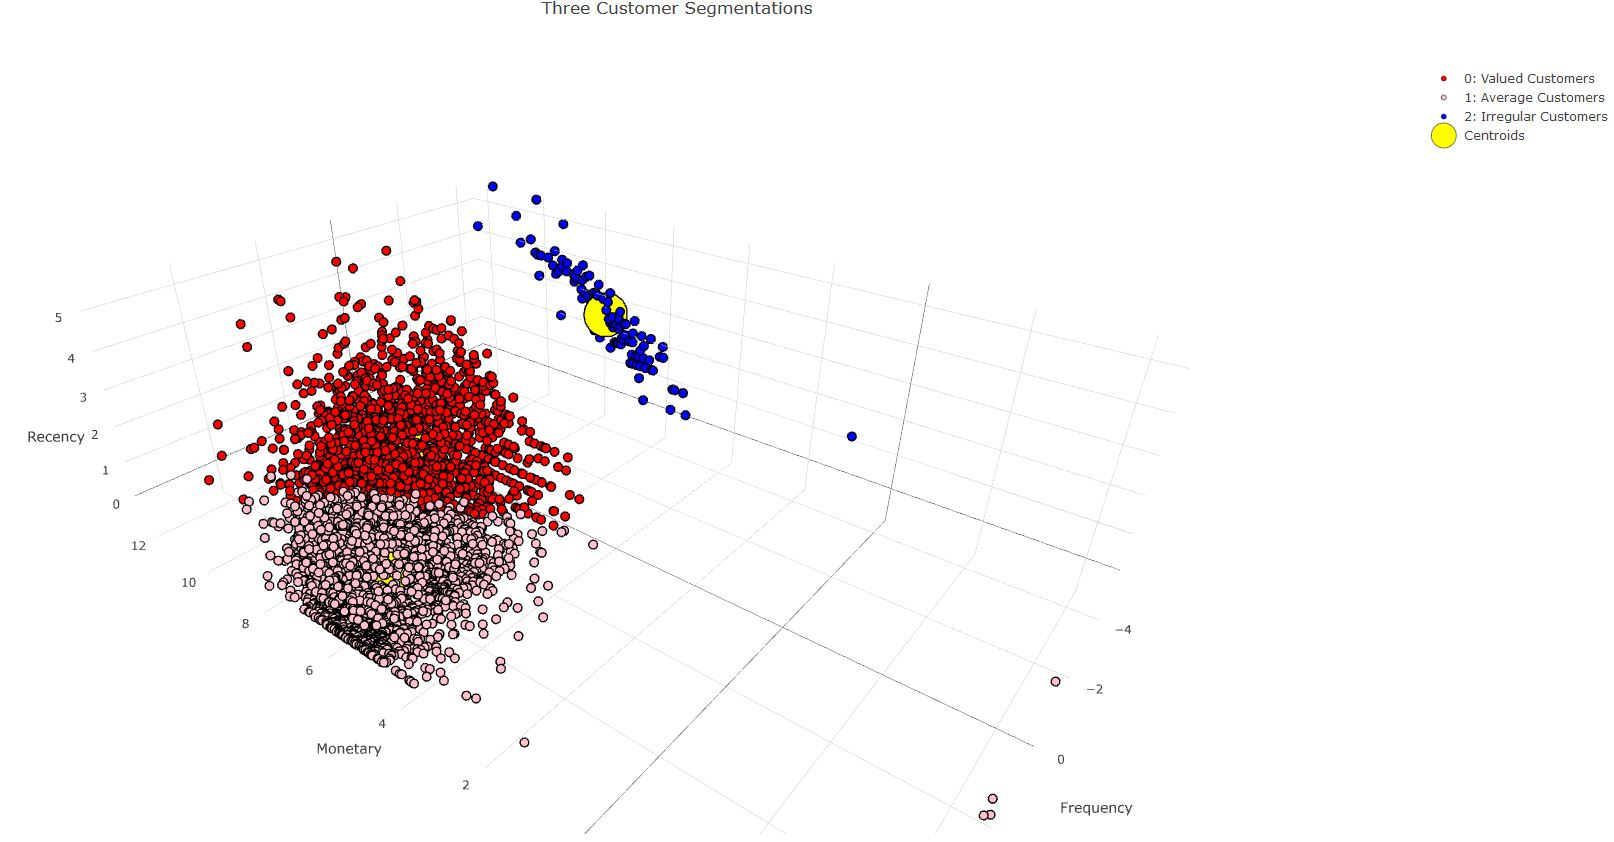

In [227]:
display(Image('https://i.imgur.com/H4E6SfS.jpg', width=950, unconfined=True))

In [228]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(y_kmeans).value_counts(), columns = ['Number Customers']).T

,1,0,2
Number Customers,2506,1761,105


Ramifications: The Silhouette score in the 3 cluster group was .01 off from the 2 cluster group. So we’ll treat this result as theoretically the best clustering output. We finally see a distinction in that third cluster on the side that shouldn’t belong with the two central clusters. We’ve identified that group as the Irregular customers group. That customer group is tricky to pin down since it’s elongated and has everything from high monetary and recency to low monetary and low recency. The frequency remains the same. Which explains why in the 2d plots we will see later, the monetary vs frequency plots look much better than the monetary vs recency plots. That’s because there is so much more overlap since customer behavior is a spectrum. 

In [229]:
n_opt_clusters = 5
kmeans = KMeans( init = 'k-means++', n_clusters = n_opt_clusters, max_iter=1000, n_init = 30, random_state=0)
kmeans.fit(matrix)
y_kmeans = kmeans.predict(matrix)



In [209]:

#visualising the clusters
centroids = getTrace(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s= 25, c = 'yellow', label='Centroids')
t1 = getTrace(matrix[y_kmeans == 0, 0], matrix[y_kmeans == 0, 1], matrix[y_kmeans == 0, 2], s= 5, c='red', label = '0: Growth Customers')
t2 = getTrace(matrix[y_kmeans == 1, 0], matrix[y_kmeans == 1, 1], matrix[y_kmeans == 1, 2], s= 5, c='pink', label = '1: Tipping Point Customers') 
t3 = getTrace(matrix[y_kmeans == 2, 0], matrix[y_kmeans == 2, 1], matrix[y_kmeans == 2, 2], s= 5, c='blue', label = '2: Best Customers') 
t4 = getTrace(matrix[y_kmeans == 3, 0], matrix[y_kmeans == 3, 1], matrix[y_kmeans == 3, 2], s= 5, c='green', label = '3: Irregular Customers') 
t5 = getTrace(matrix[y_kmeans == 4, 0], matrix[y_kmeans == 4, 1], matrix[y_kmeans == 4, 2], s= 5, c='cyan', label = '4: Loyal Customers') 



x=matrix[:,0]
y=matrix[:,1]
z=matrix[:,2]
showGraph("Five Customer Segmentations", "Monetary", [min(x),max(x)], "Frequency", [min(y),max(y)], "Recency", [min(z)-1,max(z)], [t1,t2,t3,t4, t5, centroids])

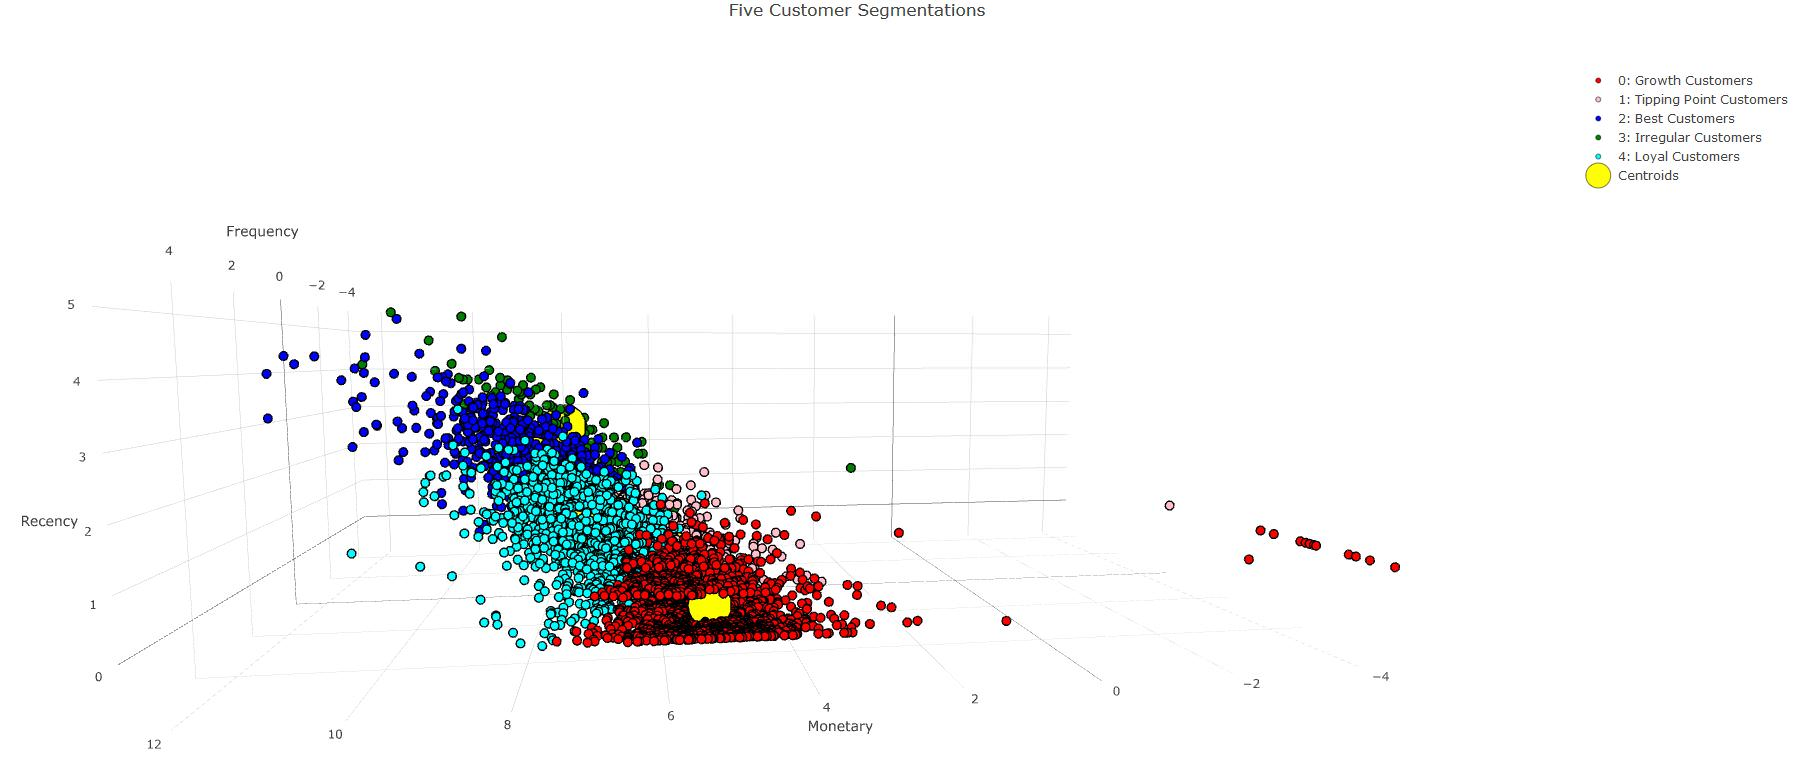

In [232]:
display(Image('https://i.imgur.com/nJyoWo2.jpg', width=950, unconfined=True))

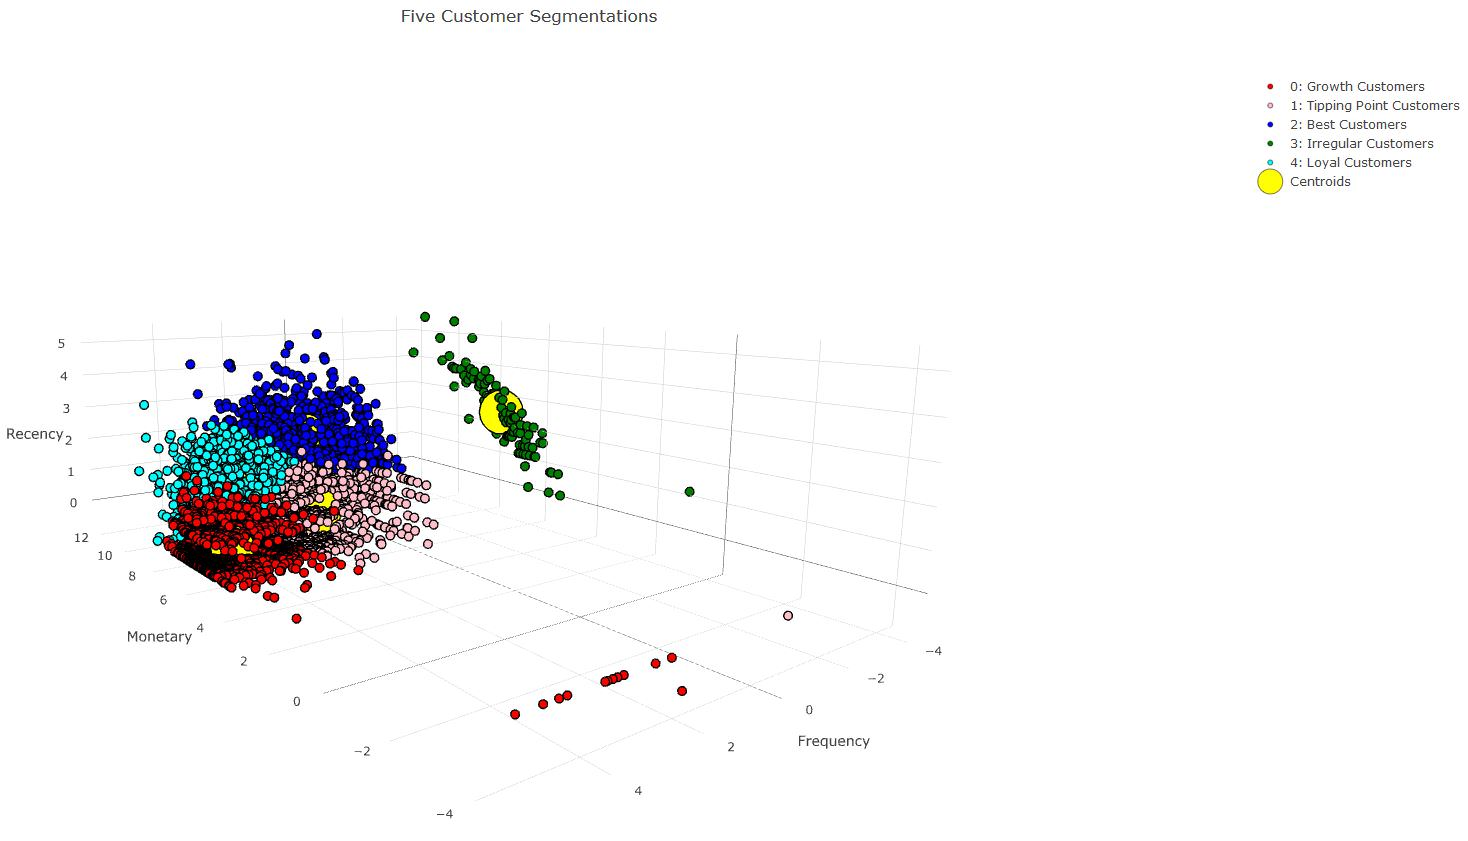

In [233]:
display(Image('https://i.imgur.com/2OChQPZ.jpg', width=950, unconfined=True))

In [234]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(y_kmeans).value_counts(), columns = ['Number Customers']).T

,0,4,1,2,3
Number Customers,1455,1221,824,767,105


Ramifications: Our subject matter expert agrees that visually this is the best clustering graph yet. We tried 6 and 7 clusters but the insights derived from those reached a plateau. The customer groups we have here are the following: 

Clustering output 

Red: Growth Customers: 1455

Pink: Tipping Point Customers: 824

Blue: Best Customers: 767

Green: Irregular Customers: 105

Cyan: Loyal Customers: 1221 

Looking at the first “Five Customer Segmentation” plot, we can clearly see how the Blue group, the Best Customers, have the highest monetary, recency, and frequency values (frequency can be better seen in the second screenshot). The Cyan group, the Loyal Customers were assigned that category because as we can see, they might not buy the most, or the most recent, but they are the highest overall group in terms of frequency. They are closer to us visually on the z axis. Next, we have the Red group, the Growth customers. They have been labeled that way, because unlike the Loyal customers, they lack in monetary and recency, but just behind them. This is a big opportunity for the sales folks, the middle customer segments that’s often ignored in business. 

Next we look at the second screenshot for the “Five Customer Segmentation.” Here we can see the frequency axis much better. And we immediately notice that the Green group, as mentioned previously are the worst customers in terms of frequency of sales. However, they are clustered in this elongated shape that makes them anywhere from big spenders to small spenders. Rightfully so, they are an Irregular customer group. And according to the 80/20 law, not worth the squeeze. 

Looking at our RFM customer segmentation assignments in Trial 1 and 2, we feel these numbers out performed them due to the inclusive spectral nature of clustering. 


## Hierarchical Clustering

Here, we perform a different type of clustering "Hierarchical Agglomerative Clustering, HAC". it treat each point as a single cluster at the beginning of the algorithm. Then merged two items at a time into a new cluster. How the pairs merge involves calculating a dissimilarity between each merged pair and the other samples. There are many ways to do this, we used "Complete", "Ward" and "Average" linkage methods. The pairing process continues until all items merge into a single cluster.

Here is the definition of each methods used:

* Complete linkage: similarity of the furthest pair. One drawback is that outliers can cause merging of close groups later than is optimal.
* Ward linkage: This method does not directly define a measure of distance between two points or clusters. It is an ANOVA based approach. One-way univariate ANOVAs are done for each variable with groups defined by the clusters at that stage of the process.  At each stage, two clusters merge that provide the smallest increase in the combined error sum of squares.
* Average linkage: The distance between two clusters to be the average distance between points in the second cluster.

The distance method which is used in our clustering is euclidean method.

We used the average silhoutte approuch for finding the number of clusters.  Briefly, it measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering.

Average silhouette method computes the average silhouette of observations for different values of n. The optimal number of clusters n is the one that maximize the average silhouette over a range of possible values for n (Kaufman and Rousseeuw [1990]).

In [81]:
%%time 


matrix = test.values
params = []
for link in ['ward', 'complete', 'average']:
    for n in range(2,20):

        # append on the clustering
        hc = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage=link)
        hc.fit(matrix)
        newfeature_hc = hc.labels_ 
        clusters_hc=hc.fit_predict(matrix)
        hc_silhouette = silhouette_score(matrix, newfeature_hc)
       #print(hc.labels_)
        print("C=", n, "Link type=", link , "Avg Silhouette_score is:", hc_silhouette)


C= 2 Link type= ward Avg Silhouette_score is: 0.31646149908521237
C= 3 Link type= ward Avg Silhouette_score is: 0.3504890963195237
C= 4 Link type= ward Avg Silhouette_score is: 0.28862818844036847
C= 5 Link type= ward Avg Silhouette_score is: 0.29947844620494746
C= 6 Link type= ward Avg Silhouette_score is: 0.29714648088026535
C= 7 Link type= ward Avg Silhouette_score is: 0.28851599369199177
C= 8 Link type= ward Avg Silhouette_score is: 0.27323495686383925
C= 9 Link type= ward Avg Silhouette_score is: 0.24242500474845755
C= 10 Link type= ward Avg Silhouette_score is: 0.24543794547008244
C= 11 Link type= ward Avg Silhouette_score is: 0.25317542697463685
C= 12 Link type= ward Avg Silhouette_score is: 0.2492939286601918
C= 13 Link type= ward Avg Silhouette_score is: 0.2542277930074384
C= 14 Link type= ward Avg Silhouette_score is: 0.2508658845081853
C= 15 Link type= ward Avg Silhouette_score is: 0.24507906371091337
C= 16 Link type= ward Avg Silhouette_score is: 0.23928169132568686
C= 17 L

Here, the maximum Silhouette scores are belong to the average linkage method as below:

* n=2 with Silhouette score=0.75
* n=3 with Silhouette score=0.68
* n=4 with Silhouette score=0.68

Here, the maximum Silhouette scores are belong to the average linkage method which is 0.69 for number of clusters = 2.

It worth to improve our HAC by looking at the dendrogram graph which helps to find the optimum number of clusters.

For our dendrogram graph, we used the ward linkage method, which results in a more acceptable graph. (we tried it with other different methods and at the end we decided to continue with ward linkage method.)

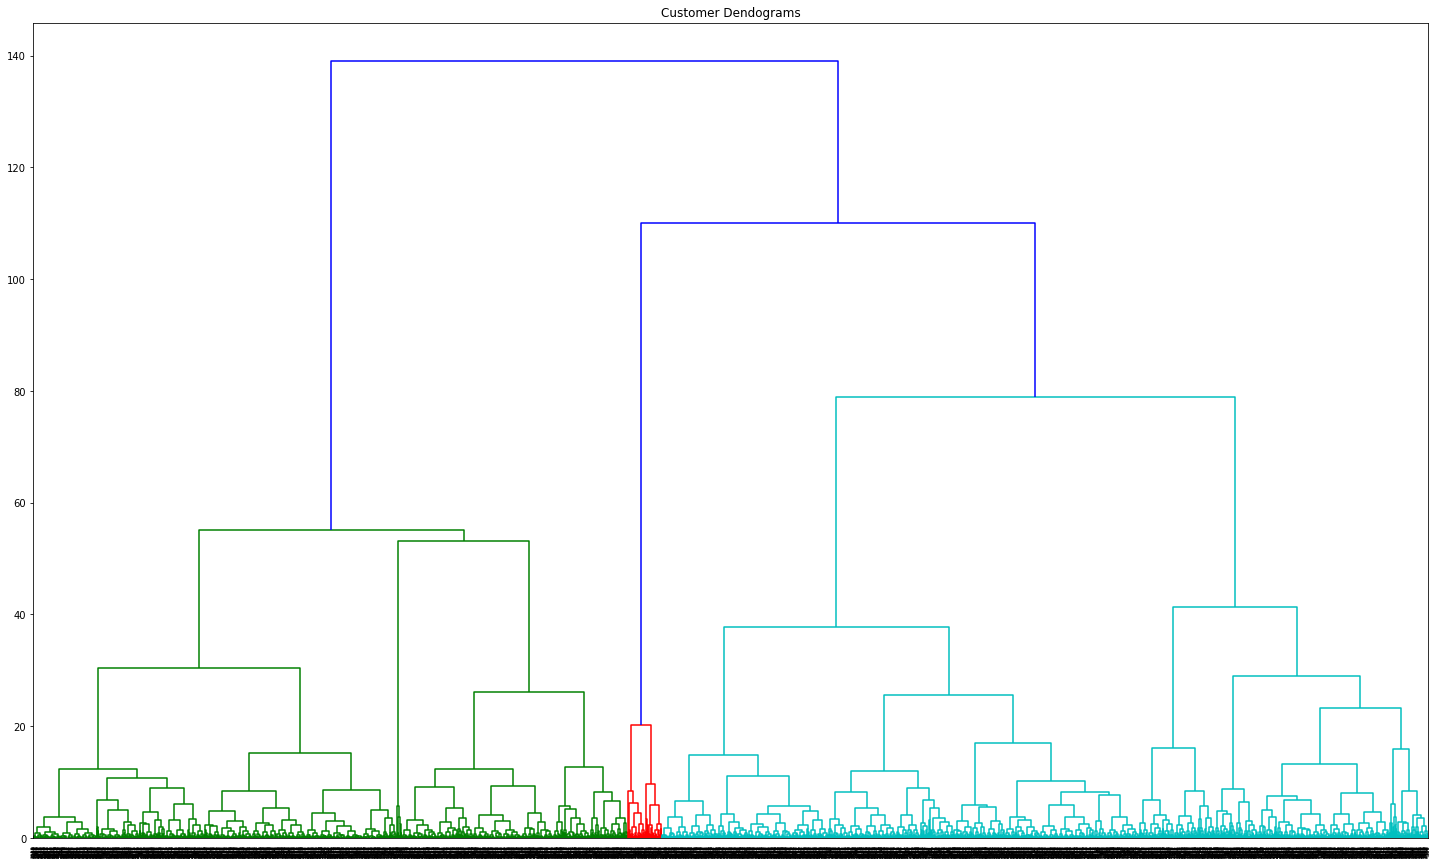

In [159]:
# Create Dendrogram graph:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(25,15))
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(matrix, method='ward')) 

By looking at the Dendrogram graph, we can pick a distance where the branches are longer and draw a cut off from there.  No cutting is wrong, and there is no definite procedure to do that. several cutoffs might be equally good from a theoretical point of view. 

By considering 60,80 and 120 as the distance, we will have 4, 3 and 2 clusters. Next, we will inspect the number of clusters visually by scatter plots and will find out the number of clusters.

Here, we visualy inspect the number of clusters with scatter plots for average method and number of clusters equal to 2, 3 and 4. we would like to find the optimal number of clusters.

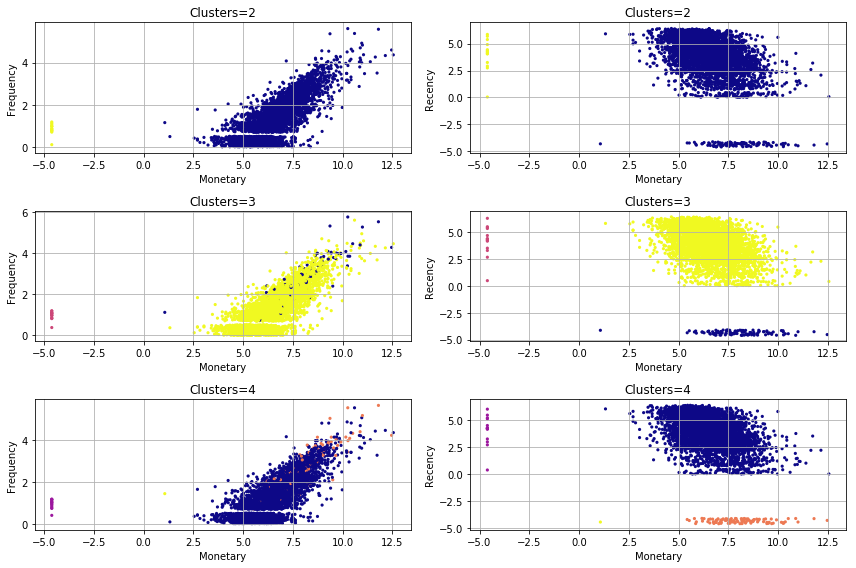

In [84]:
data = matrix

# Scatter plots for n=2 and linkage=average
cls = AgglomerativeClustering(n_clusters=2, linkage='average')
cls.fit(data)
hac_labels_2 = cls.labels_ 
# Scatter plots for n=3 and linkage=average
cls = AgglomerativeClustering(n_clusters=3, linkage='average')
cls.fit(data)
hac_labels_3 = cls.labels_ 
# Scatter plots for n=4 and linkage=average
cls = AgglomerativeClustering(n_clusters=4, linkage='average')
cls.fit(data)
hac_labels_4 = cls.labels_ 

fig = plt.figure(figsize=(12,8))
title = ['Clusters=2','Clusters=3','Clusters=4']

for i,l in enumerate([hac_labels_2,hac_labels_3, hac_labels_4]):
    
    plt.subplot(3,2,2*i+1)
    plt.scatter(matrix[:, 0], matrix[:, 2]+np.random.random(matrix[:, 1].shape)/2, c=l, cmap='plasma', s=10, linewidths=0)
    plt.xlabel('Monetary'), plt.ylabel('Frequency')
    plt.grid()
    plt.title(title[i])

    plt.subplot(3,2,2*i+2)
    plt.scatter(matrix[:, 0], matrix[:, 1]+np.random.random(matrix[:, 1].shape)/2, c=l, cmap='plasma', s=10, linewidths=0)
    plt.xlabel('Monetary'), plt.ylabel('Recency')
    plt.grid()
    plt.title(title[i])

plt.tight_layout()
plt.show()

By reviewing the above graphs, customer segmentation in clusters equal to 3 is the better one, it illustrate the better division.
But, still we do not find the average linkage method as our most favarite in this case as we do not see a good customer segmentation in this method. we may have a better segmentation in ward method.

In the next step, we will switch the linkage method to "ward" and will visualize the number of clusters in the range of 2 and 6. We will see if we can get a better customer segmentation.

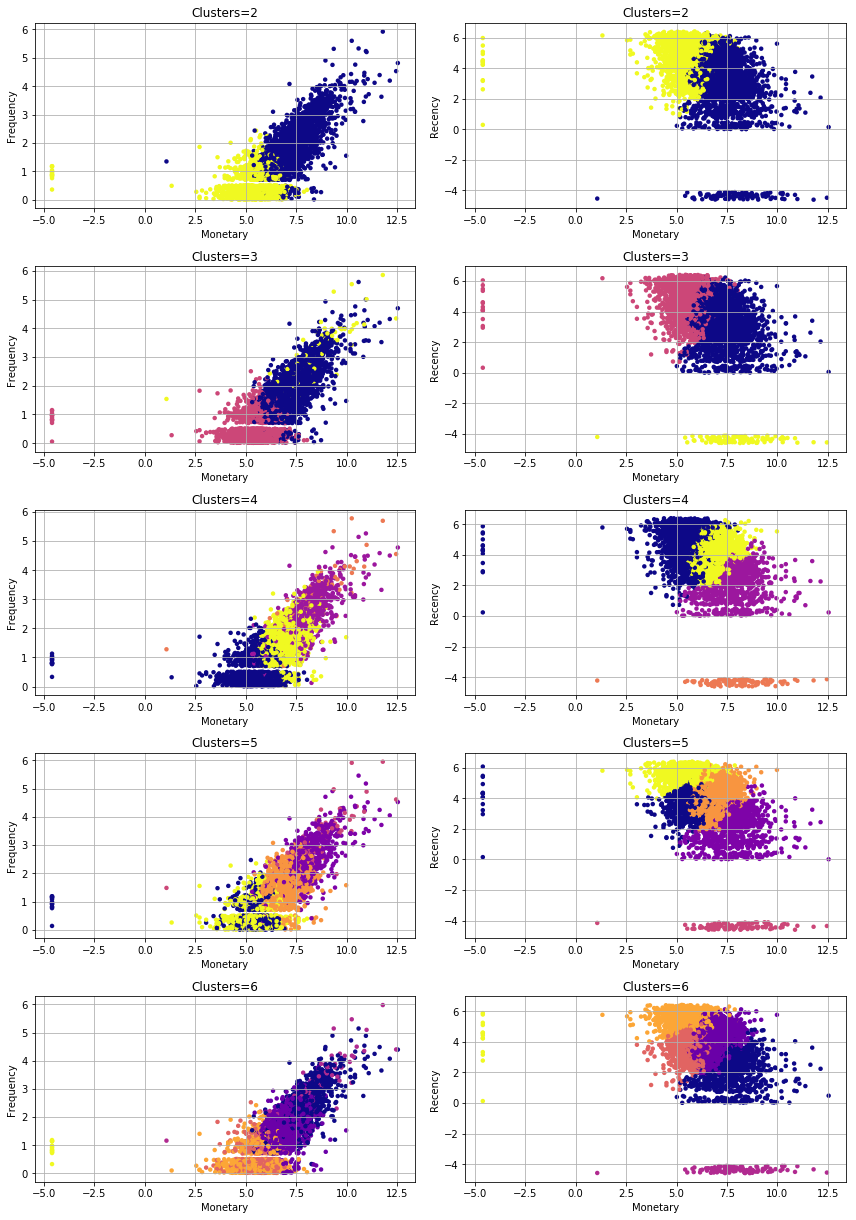

In [96]:
# Scatter plots for n=2 and linkage=ward
cls = AgglomerativeClustering(n_clusters=2, linkage='ward')
cls.fit(data)
hac_labels_2 = cls.labels_ 
# Scatter plots for n=3 and linkage=ward
cls = AgglomerativeClustering(n_clusters=3, linkage='ward')
cls.fit(data)
hac_labels_3 = cls.labels_ 
# Scatter plots for n=4 and linkage=ward
cls = AgglomerativeClustering(n_clusters=4, linkage='ward')
cls.fit(data)
hac_labels_4 = cls.labels_ 
# Scatter plots for n=5 and linkage=ward
cls = AgglomerativeClustering(n_clusters=5, linkage='ward')
cls.fit(data)
hac_labels_5 = cls.labels_ 
# Scatter plots for n=6 and linkage=ward
cls = AgglomerativeClustering(n_clusters=6, linkage='ward')
cls.fit(data)
hac_labels_6 = cls.labels_ 

fig = plt.figure(figsize=(12,20))
title = ['Clusters=2','Clusters=3','Clusters=4', 'Clusters=5','Clusters=6']

for i,l in enumerate([hac_labels_2,hac_labels_3, hac_labels_4, hac_labels_5, hac_labels_6]):
    
    plt.subplot(6,2,2*i+1)
    plt.scatter(matrix[:, 0], matrix[:, 2]+np.random.random(matrix[:, 1].shape)/2, c=l, cmap='plasma', s=20, linewidths=0)
    plt.xlabel('Monetary'), plt.ylabel('Frequency')
    plt.grid()
    plt.title(title[i])

    plt.subplot(6,2,2*i+2)
    plt.scatter(matrix[:, 0], matrix[:, 1]+np.random.random(matrix[:, 1].shape)/2, c=l, cmap='plasma', s=20, linewidths=0)
    plt.xlabel('Monetary'), plt.ylabel('Recency')
    plt.grid()
    plt.title(title[i])

plt.tight_layout()
plt.show()

Graphs above also illustrate that the better segmentation is for three clusters.

# DBScan

In [98]:
colors = ['purple','orange','lightblue','red','gray','green','fuchsia','blue','violet','gold',
         'firebrick','olive','lime','navy','lightpink']

lbls = ['first','second','third','forth','fifth','sixth','seventh']

In [99]:
db = DBSCAN(eps=0.33, min_samples=7).fit(data)

Percent of outliers:  9.9 %
Estimated number of clusters: 10


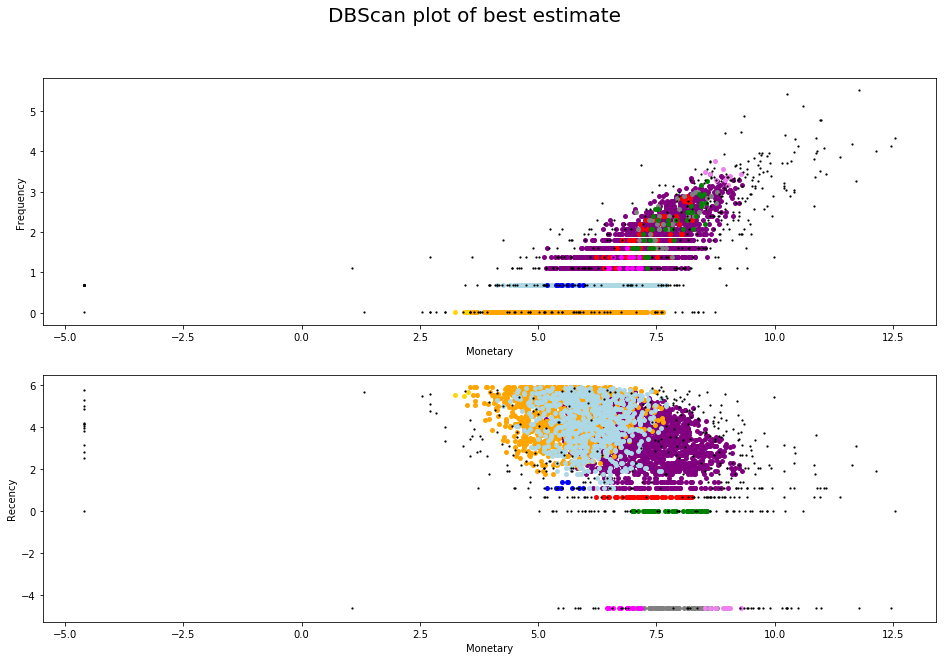

In [100]:
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


print("Percent of outliers: ",str(round((len(labels[db.labels_==-1])/len(labels))*100,2)),"%")

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)



fig, axarr = plt.subplots(2, 1,figsize = (16,10))
plt.suptitle('DBScan plot of best estimate', size = 20)
for ind, x in enumerate(set(labels)):
    if x == -1:
        axarr[0].scatter(data[labels==-1,0],data[labels==-1, 2],c='black', cmap=plt.cm.rainbow, s=5, linewidths=0, label='outlier')
    else:
        axarr[0].scatter(x=data[labels==x,0],y=data[labels==x, 2],c=colors[ind], cmap=plt.cm.rainbow, s=25, linewidths=0)

# plt.legend()
# plt.show()

for ind, x in enumerate(set(labels)):
    if x == -1:
        axarr[1].scatter(data[labels==-1,0],data[labels==-1, 1],c='black', cmap=plt.cm.rainbow, s=5, linewidths=0, label='outlier')
    else:
        axarr[1].scatter(data[labels==x,0],data[labels==x, 1],c=colors[ind], cmap=plt.cm.rainbow, s=25, linewidths=0)
axarr.flat[0].set(xlabel='Monetary', ylabel='Frequency')
axarr.flat[1].set(xlabel='Monetary', ylabel='Recency')

plt.show()


Here we do an initial clustering with DBScan. We find that the initial model has very few outliers, but the number of clusters aren't aligning with previous observations. We will run a silhouette test to see the configuration that gives us the best score.

In [101]:
best_score = -1
best_eps = 0
best_samples = 0


for eps_n in np.linspace(.25,.75,10):
    for samples_n in np.linspace(15,50,20):
        db = DBSCAN(eps=eps_n, min_samples=samples_n).fit(data)
#         db = DBSCAN(eps=eps_n, min_samples=samples_n).fit_predict(data)
#         db.fit(matrix)
#         db.
        labels = db.labels_        
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        #print(n_clusters_, eps_n, samples_n)
        if n_clusters_ > 2:
            silhouette_avg = round(silhouette_score(matrix, labels),2)
            if(silhouette_avg>best_score):
                best_score = silhouette_avg
                best_eps = eps_n
                best_samples = samples_n
                print("For n_clusters =", n_clusters_,  "The average silhouette_score is :", silhouette_avg)
                print("For eps =", round(eps_n,3),  "min_samples :", round(samples_n,3))

For n_clusters = 10 The average silhouette_score is : -0.28
For eps = 0.25 min_samples : 15.0
For n_clusters = 4 The average silhouette_score is : -0.24
For eps = 0.25 min_samples : 26.053
For n_clusters = 4 The average silhouette_score is : -0.12
For eps = 0.25 min_samples : 29.737
For n_clusters = 3 The average silhouette_score is : -0.07
For eps = 0.25 min_samples : 37.105
For n_clusters = 4 The average silhouette_score is : -0.02
For eps = 0.306 min_samples : 15.0
For n_clusters = 3 The average silhouette_score is : 0.07
For eps = 0.361 min_samples : 20.526
For n_clusters = 4 The average silhouette_score is : 0.19
For eps = 0.417 min_samples : 15.0
For n_clusters = 3 The average silhouette_score is : 0.21
For eps = 0.472 min_samples : 16.842
For n_clusters = 3 The average silhouette_score is : 0.22
For eps = 0.639 min_samples : 26.053


Percent of outliers:  6.7 %
Estimated number of clusters: 3


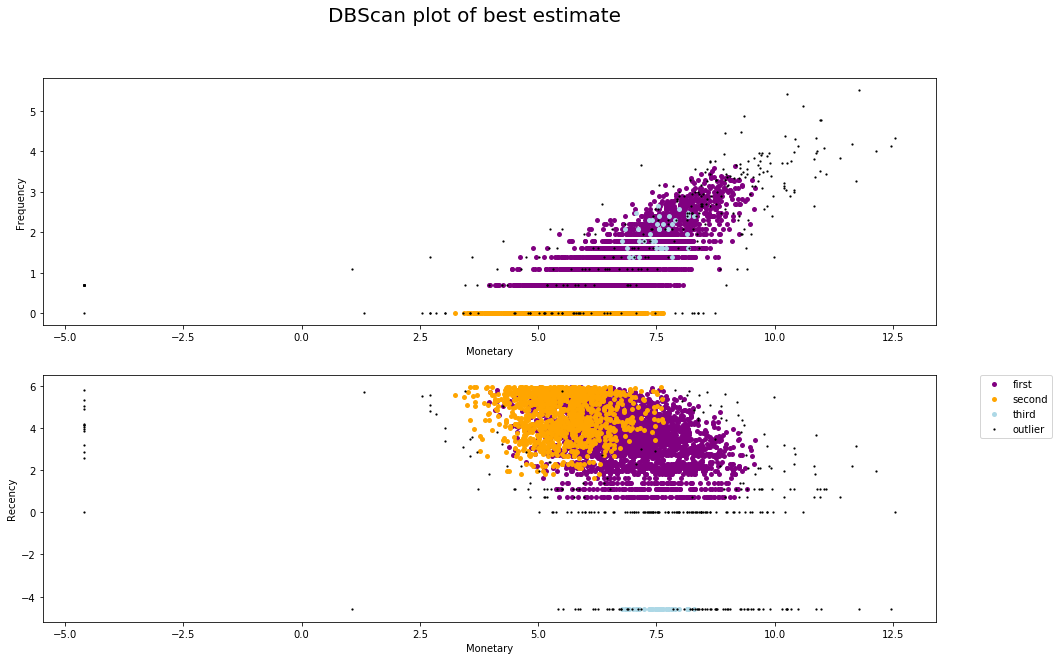

In [102]:
db = DBSCAN(eps=best_eps, min_samples=best_samples).fit(data)

labels = db.labels_


print("Percent of outliers: ",str(round((len(labels[db.labels_==-1])/len(labels))*100,2)),"%")

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)



fig, axarr = plt.subplots(2, 1,figsize = (16,10))
plt.suptitle('DBScan plot of best estimate', size = 20)
for ind, x in enumerate(set(labels)):
    if x == -1:
        axarr[0].scatter(data[labels==-1,0],data[labels==-1, 2],c='black', cmap=plt.cm.rainbow, s=5, linewidths=0, label='outlier')
    else:
        axarr[0].scatter(x=data[labels==x,0],y=data[labels==x, 2],c=colors[ind], cmap=plt.cm.rainbow, s=25, linewidths=0, label=lbls[ind])

# plt.legend()
# plt.show()

for ind, x in enumerate(set(labels)):
    if x == -1:
        axarr[1].scatter(data[labels==-1,0],data[labels==-1, 1],c='black', cmap=plt.cm.rainbow, s=5, linewidths=0, label='outlier')
    else:
        axarr[1].scatter(data[labels==x,0],data[labels==x, 1],c=colors[ind], cmap=plt.cm.rainbow, s=25, linewidths=0, label=lbls[ind])
axarr.flat[0].set(xlabel='Monetary', ylabel='Frequency')
axarr.flat[1].set(xlabel='Monetary', ylabel='Recency')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


We find that after running the silhouette test that the best score gives us 3 clusters and reduces the percentage of outliers to just under 7%. This seems like a better fit, especially given that this is the optimal silhouetter score.

Percent of outliers:  6.98 %
Estimated number of clusters: 6


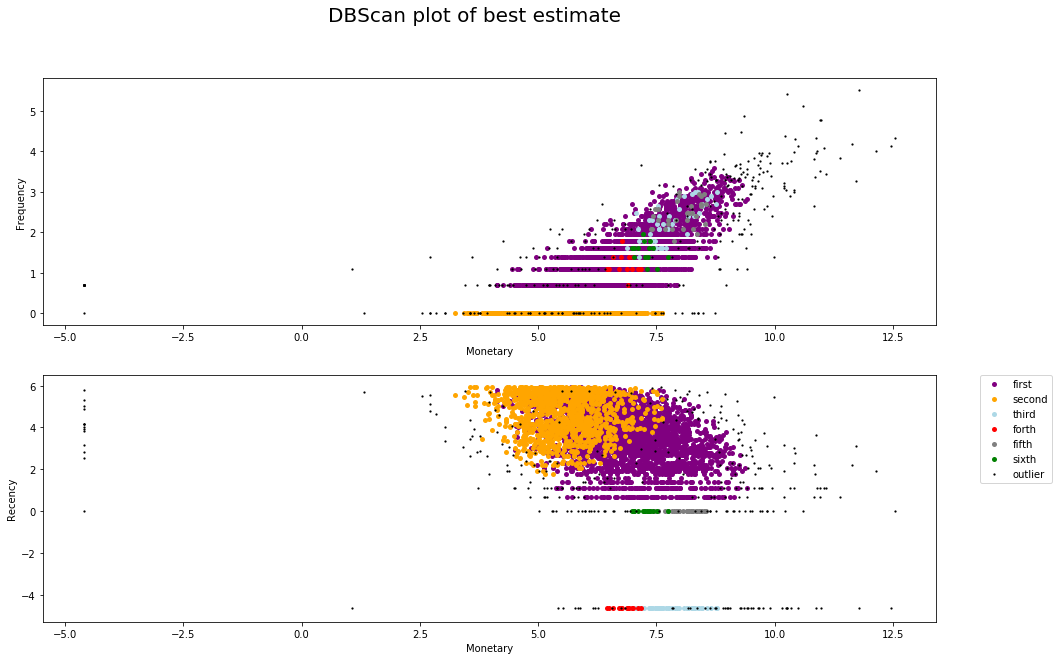

In [103]:
db = DBSCAN(eps=0.45, min_samples=13).fit(data)

# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


print("Percent of outliers: ",str(round((len(labels[db.labels_==-1])/len(labels))*100,2)),"%")

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)



fig, axarr = plt.subplots(2, 1,figsize = (16,10))
plt.suptitle('DBScan plot of best estimate', size = 20)
for ind, x in enumerate(set(labels)):
    if x == -1:
        axarr[0].scatter(data[labels==-1,0],data[labels==-1, 2],c='black', cmap=plt.cm.rainbow, s=5, linewidths=0, label='outlier')
    else:
        axarr[0].scatter(x=data[labels==x,0],y=data[labels==x, 2],c=colors[ind], cmap=plt.cm.rainbow, s=25, linewidths=0, label=lbls[ind])

# plt.legend()
# plt.show()

for ind, x in enumerate(set(labels)):
    if x == -1:
        axarr[1].scatter(data[labels==-1,0],data[labels==-1, 1],c='black', cmap=plt.cm.rainbow, s=5, linewidths=0, label='outlier')
    else:
        axarr[1].scatter(data[labels==x,0],data[labels==x, 1],c=colors[ind], cmap=plt.cm.rainbow, s=25, linewidths=0, label=lbls[ind])
axarr.flat[0].set(xlabel='Monetary', ylabel='Frequency')
axarr.flat[1].set(xlabel='Monetary', ylabel='Recency')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


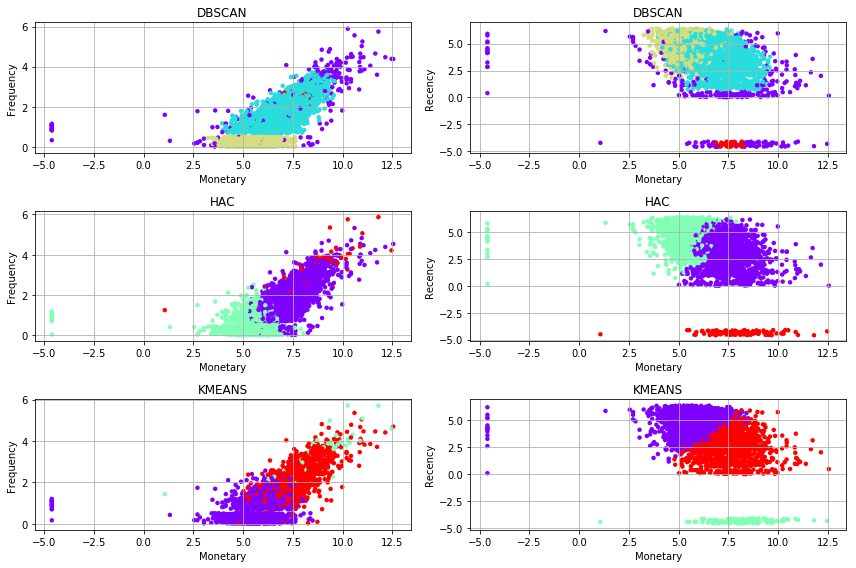

In [110]:
# #combined clusters for all clustering methods (DBS, HAC, K-means).

data = matrix

cls = DBSCAN(eps=0.639, min_samples=26.053)
cls.fit(data)
dbs_labels = cls.labels_ 

cls = AgglomerativeClustering(n_clusters=3, linkage='ward')
cls.fit(data)
hac_labels = cls.labels_ 

cls = KMeans(n_clusters=3, random_state=1)
cls.fit(data)
kmn_labels = cls.labels_

fig = plt.figure(figsize=(12,8))
title = ['DBSCAN','HAC','KMEANS']

for i,l in enumerate([dbs_labels, hac_labels,kmn_labels]):
    
    plt.subplot(3,2,2*i+1)
    plt.scatter(data[:, 0], data[:, 2]+np.random.random(data[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Monetary'), plt.ylabel('Frequency')
    plt.grid()
    plt.title(title[i])
    
    plt.subplot(3,2,2*i+2)
    plt.scatter(data[:, 0], data[:, 1]+np.random.random(data[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Monetary'), plt.ylabel('Recency')
    plt.grid()
    plt.title(title[i])
    
    


plt.tight_layout()
plt.show()

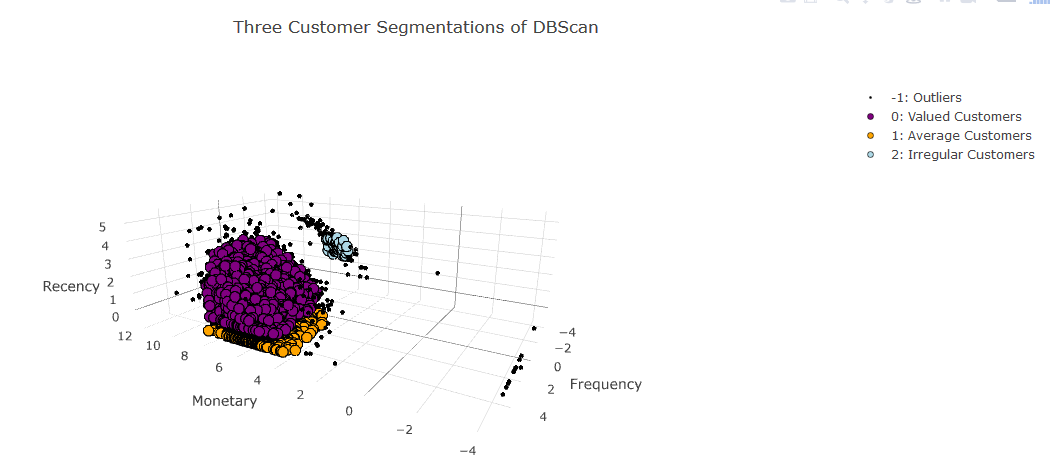

In [4]:
display(Image('https://i.imgur.com/FsVkTkb.png', width=900, unconfined=True))

Overall Ramifications (with DBscan and HAC): These models allowed us to have the ability to systematically craft a highly targeted marketing campaigns for different customer groups. It aided in customer relationship building an customer conversion. Not just from a non-customer to a customer, but from one type to another. We can aid the sales team in strategically approaching the customer with the correct assumptions. Not to mention, decrease negative reactions from customer due to misidentified targeting. This model serves as a launch off for historical analysis and should not be used for prospects. We believe that all three models did similar clustering segmentation of customers due to the decreased variability of having 3 features. However, the HAC and DBScan actually identified customers with low or zero recency, moderate frequency, and moderate monetary, where as we didn’t see that with K-Means. We think HAC and DBScan both identified customers that can be targeted to purchase products, who otherwise haven't purchased anything recently.

# 3D Clustering using Alpha Shapes

This was just an interesting experiment to see what happens to our customer segmentation if we use Alpha Shapes. According to MatLab, "The alpha shape of a set of points is a generalization of the convex hull and a subgraph of the Delaunay triangulation. That is, the convex hull is just one type of alpha shape, and the full family of alpha shapes can be derived from the Delaunay triangulation of a given point set." 

In [174]:
#Coding Source: https://plot.ly/python/3d-point-clustering/#reference
#MatLab Source: https://www.mathworks.com/examples/matlab/mw/matlab-ex67295599-alpha-shapes      

import plotly.plotly as py
import pandas as pd
import plotly

df = test
df.head()      #segmentation.drop(['R_Quartile','F_Quartile','M_Quartile'

scatter = dict(
    mode = "markers",
    name = "y",
    type = "scatter3d",    
    x = df['Monetary'], y = df['Recency'], z = df['Frequency'],
    marker = dict( size=4, color="rgb(23, 190, 207)" )
)
clusters = dict(
    alphahull = 7,
    name = "y",
    opacity = 0.1,
    type = "mesh3d",    
    x = df['Monetary'], y = df['Recency'], z = df['Frequency']
)
layout = dict(
    title = '3d point clustering',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
        zaxis = dict( zeroline=False ),
    )
)
figg = dict( data=[scatter, clusters], layout=layout )
plotly.offline.plot(figg, auto_open=True)

#The output is an html file. We add the screenshot below. 

'file://C:\\Users\\Bahr\\Desktop\\SMU_DS_Summer_2018\\Data_Mining\\Assignments\\lab 3 final\\MSDS7331_NorthCarolinaDataset\\Lab3\\temp-plot.html'

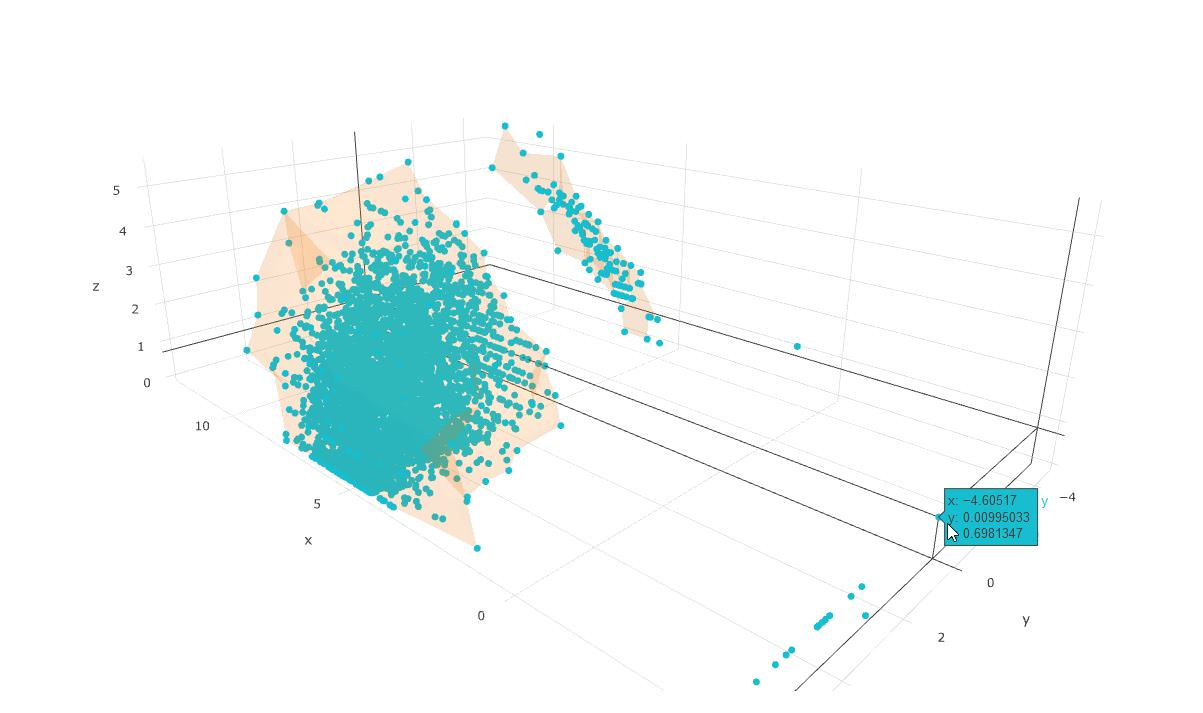

In [177]:
display(Image('https://i.imgur.com/XR2xuPa.jpg', width=900, unconfined=True))

# Association Rule Mining

### Create lists of different descriptions

First with association rules we have to create the rules. We are using a subset of the entire population datasets where the transactions are purchases. We are also using a copy of the original dataset including all transactions where the Customer ID was null. We are not relying on CustomerID for this analysis, rather we will be doing associations amongst the items purchased, so we would rather keep in these rows as they will help with our analysis. 

### Create lists of different descriptions

In [ ]:
from apyori import apriori

In [ ]:
marketing_data_with_ID = marketing_data_copy.copy()

marketing_data_with_ID.drop_duplicates(inplace = True)

In [ ]:
# Create the second data set that retains all the Customer ID for the Association Rules
# Change the rows with missing  data in CustomerID column:
marketing_data.dropna(subset=['Description'], inplace=True)

country_map = {'Bahrain':999991, 'EIRE':999992, 'France':999993, 'Hong Kong':999994, 'Israel':999995, 
               'Portugal':999996, 'Spain':999997, 'Switzerland':999998, 'United Kingdom':999999, 'Unspecified':999990}

marketing_data_with_ID['CustomerID'] = np.where(marketing_data_with_ID.CustomerID.isnull(),marketing_data_with_ID.Country.map(country_map),
                                               marketing_data_with_ID.CustomerID)


In [ ]:
for ind,el in enumerate(marketing_data_with_ID['Description']):
    if type(el) != str:
        marketing_data_with_ID.loc[ind,'Description']='Unknown'
    elif re.match('.*[a-zA-Z]+.*',el) is not None:
        pass
    else:
        marketing_data_with_ID.loc[ind,'Description']='Unknown'
        
# Create the TotalPrice feature
marketing_data_with_ID['TotalPrice'] = marketing_data_with_ID['Quantity']*marketing_data_with_ID['UnitPrice']

In [ ]:
by_invoice_with_ID = marketing_data_with_ID.groupby(['InvoiceNo', 'InvoiceDate','Country','CustomerID'], as_index=False)[ 'UnitPrice','Description','Quantity','TotalPrice'].agg(lambda x: list(x))

for ind,el in enumerate(by_invoice_with_ID['Description']):
    if type(el[0]) != str:
        by_invoice_with_ID.drop(ind,inplace=True)

by_invoice_with_ID['TotalPrice'] = by_invoice_with_ID['TotalPrice'].apply(sum)
by_invoice_with_ID['QuantityTotal'] = by_invoice_with_ID['Quantity'].apply(sum)
by_invoice_with_ID['Description_as_string'] = by_invoice_with_ID['Description'].apply(lambda x: "-".join(sorted(x)))

In [ ]:
by_invoice_with_ID['Transaction']=''

for index,row in by_invoice_with_ID.iterrows():
    if str(row['InvoiceNo']).startswith("C"):
        by_invoice_with_ID.loc[index,'Transaction'] = 'Cancel'
    elif str(row['InvoiceNo']).startswith("A"):
        by_invoice_with_ID.loc[index,'Transaction'] = 'Adjust'
    else:
        by_invoice_with_ID.loc[index,'Transaction'] = 'Purchase'

# Plot of sales stats overtime

In [ ]:
sales_data = by_invoice_with_ID[by_invoice_with_ID.Transaction=="Purchase"]

In [ ]:
sales_data = sales_data.copy()
sales_data.loc[:,'Average_per_item_cost'] = sales_data.apply(lambda x: x['TotalPrice'] / sum(x['Quantity']),axis=1)

In [ ]:
sales_data.head(5)

In [ ]:
timeseries_sales_data = sales_data.drop(['CustomerID','Country','Description','Transaction'],axis=1)

In [ ]:
times = pd.to_datetime(sales_data.InvoiceDate)

timeseries_sales_data_group = timeseries_sales_data.groupby(times.dt.date)
timeseries_sales_data_group_avg = timeseries_sales_data_group.median()

In [ ]:
width = 5
lag1 = timeseries_sales_data_group_avg['TotalPrice'].shift(1)
lag3 = timeseries_sales_data_group_avg['TotalPrice'].shift(width - 1)
window = lag3.rolling(window=width)
smooth_TotalPrice = window.mean()
smooth_TotalPrice.name='smooth_TotalPrice'
smooth_TotalPrice = smooth_TotalPrice

lag1 = timeseries_sales_data_group_avg['QuantityTotal'].shift(1)
lag3 = timeseries_sales_data_group_avg['QuantityTotal'].shift(width - 1)
window = lag3.rolling(window=width)
smooth_QuantityTotal = window.mean()
smooth_QuantityTotal.name='smooth_QuantityTotal'
smooth_QuantityTotal = smooth_QuantityTotal


timeseries_sales_data_group_avg = pd.concat([timeseries_sales_data_group_avg, smooth_TotalPrice, smooth_QuantityTotal, smooth_Average_per_item_cost],axis=1)

In [ ]:
fig = plt.figure(figsize=(16,10))
plt.plot(timeseries_sales_data_group_avg.index,timeseries_sales_data_group_avg.smooth_QuantityTotal, label='Average Quantity');
plt.plot(timeseries_sales_data_group_avg.index,timeseries_sales_data_group_avg.smooth_TotalPrice, label='Average Total Price')
plt.title('Average sales stats per day',size=20)
plt.legend()
plt.show()

## Running Apriori for Association Rules

In [ ]:
list_purchase_marketing_data_grouping_descriptions = []
for el in by_invoice_with_ID.loc[by_invoice_with_ID['Transaction']=='Purchase','Description']:
    if len(el)>1:
        list_purchase_marketing_data_grouping_descriptions.append(el)

In [ ]:
purchase_rules = apriori(list_purchase_marketing_data_grouping_descriptions, min_support=0.005,min_confidence=.2, 
                         max_confidence=.95,min_lift=0.3,max_lift=100,min_length=2, max_length=3 )

purchase_results = list(purchase_rules)

In [ ]:
Markdown("""
## Aproiri results

For the apriori algorithm we wanted to have a range of 2-3 transactions per relationship, meaning there would be 1-2 antecedents and 1 consequent.
We set the support low because we wanted to find as many relationships possible to use in our analysis. In the end you found {num_n} relationships that meet the minimum criteria.
""".format(num_n = len(purchase_results)))

In [ ]:
purchase_list = [list(x) for x in purchase_results]
antec = []
conseq = []
support = []
conf = []
lift = []


#Here we are creating a dataframe for each relationship from the apriori rule set
for elem in purchase_list:
    antec.append(str(elem[2][0][0]))
    conseq.append(str(elem[2][0][1]))
    support.append(elem[1])
    conf.append(elem[2][0][2])
    lift.append(elem[2][0][3])

    
purchase_df = pd.DataFrame(data={'antecedants':antec,'consequents':conseq,'support':support,
                                 'confidence':conf,'lift':lift})

#Here we are removing anything related to this data coming from frozensets
purchase_df['antecedants'] = purchase_df['antecedants'].apply(lambda x: x.replace(r"frozenset({'",""))
purchase_df['antecedants'] = purchase_df['antecedants'].apply(lambda x: x.replace(r'frozenset({"',""))
purchase_df['antecedants'] = purchase_df['antecedants'].apply(lambda x: x.replace(r'"})',''))
purchase_df['antecedants'] = purchase_df['antecedants'].apply(lambda x: x.replace(r"'})",''))
purchase_df['antecedants'] = purchase_df['antecedants'].apply(lambda x: x.replace(r"', '",' & '))
purchase_df['antecedants'] = purchase_df['antecedants'].apply(lambda x: x.replace(r'", "',' & '))
purchase_df['antecedants'] = purchase_df['antecedants'].apply(lambda x: x.strip())


purchase_df['consequents'] = purchase_df['consequents'].apply(lambda x: x.replace(r"frozenset({'",""))
purchase_df['consequents'] = purchase_df['consequents'].apply(lambda x: x.replace(r'frozenset({"',""))
purchase_df['consequents'] = purchase_df['consequents'].apply(lambda x: x.replace(r'"})',''))
purchase_df['consequents'] = purchase_df['consequents'].apply(lambda x: x.replace(r"'})",''))
purchase_df['consequents'] = purchase_df['consequents'].apply(lambda x: x.strip())

purchase_df = purchase_df.sort_values(by='support',ascending=False)

In [ ]:
NBR_TOP_VALUES = 25

ants = []
cons = []
loop_round = 0
for ant in purchase_df['antecedants']:
    if ant in ants:
        pass
    elif loop_round >= NBR_TOP_VALUES:
        break
    else:
        ants.append(ant)
        loop_round+=1
loop_round = 0
for con in purchase_df['consequents']:
    if con in cons:
        pass
    elif loop_round >= NBR_TOP_VALUES:
        break
    else:
        cons.append(con)
        loop_round+=1

top_support_apriori_values = pd.DataFrame(index = ants, columns=cons, data = np.zeros([NBR_TOP_VALUES,NBR_TOP_VALUES]))

for index, rows in purchase_df.iterrows():
    if rows['antecedants'] in top_support_apriori_values.index and rows['consequents'] in top_support_apriori_values.columns:
        top_support_apriori_values.at[rows['antecedants'],rows['consequents']]=rows['support']
        
top_conf_apriori_values = pd.DataFrame(index = ants, columns=cons, data = np.zeros([NBR_TOP_VALUES,NBR_TOP_VALUES]))

for index, rows in purchase_df.iterrows():
    if rows['antecedants'] in top_conf_apriori_values.index and rows['consequents'] in top_conf_apriori_values.columns:
        top_conf_apriori_values.at[rows['antecedants'],rows['consequents']]=rows['confidence']
        
top_lift_apriori_values = pd.DataFrame(index = ants, columns=cons, data = np.zeros([NBR_TOP_VALUES,NBR_TOP_VALUES]))

for index, rows in purchase_df.iterrows():
    if rows['antecedants'] in top_lift_apriori_values.index and rows['consequents'] in top_lift_apriori_values.columns:
        top_lift_apriori_values.at[rows['antecedants'],rows['consequents']]=rows['lift']

In [ ]:
ant = purchase_df.antecedants.iloc[0]
con = purchase_df.consequents.iloc[0]
sup = purchase_df.support.iloc[0]
lift = purchase_df.lift.iloc[0]
conf = purchase_df.confidence.iloc[0]
Markdown("""
# Association Rules Rundown
With Association rules (implemented with apriori in Python), you find associative relationships between the antecedent and consequents. 
It can be easy to think of the relationship as an if then statement, if you purchase **{ant}** then there is a certain likelihood you will buy **{con}**. 

There are a number of ways to measure the relationship between the antecedent and the consequent. First the is support, which states what is the proportion of the entire population of transactions that the pair show up in, for **{ant}** and **{con}** **{sup}%** of the entire transactions have that pair.

Next, there is confidence, which indicates that out of all of the transactions that have the antecedent, include the consequent. This means that **{conf}%** of the transactions with **{ant}** include **{con}**.

Last there is lift, which indicate how much more likely the consequent is to be included when the antecedent is on the transaction. Which means **{con}** is **{lift}** times more likely to be purchased when **{ant}** is purchased.  
""".format(ant = ant, con=con, lift=round(lift,1), sup = round(sup*100,2), conf = round(conf*100,2)))

In [ ]:
ax = sns.clustermap(top_conf_apriori_values, figsize=(16,10),cmap='RdBu');
ax.fig.suptitle('Clustermap of confidence of items with the most support',size  = 28)
plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=30, ha='right');

for ind_i,i in enumerate(ax.ax_heatmap.xaxis.get_ticklabels()):
    for ind_j,j in enumerate(ax.ax_heatmap.yaxis.get_ticklabels()):
        
        
        #Removes text added to tick labels
        i_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(i))
        i_text = re.sub(r"[\'\"]\)$",'',i_text)
        
        j_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(j))
        j_text = re.sub(r"[\'\"]\)$",'',j_text)

        text = ax.ax_heatmap.text(ind_j, ind_i, int(top_conf_apriori_values.loc[j_text, i_text]*100),
                       ha="center", va="center", color="black",position=(ind_i+.5,ind_j+.5))

ax.ax_heatmap.set_xlabel('consequents', size = 20);
ax.ax_heatmap.set_ylabel('antecedants', size = 20);

In [ ]:
ax = sns.clustermap(top_lift_apriori_values, figsize=(16,10),cmap='RdBu');
ax.fig.suptitle('Clustermap of lift of items with the most support',size  = 28)
plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=30, ha='right');

for ind_i,i in enumerate(ax.ax_heatmap.xaxis.get_ticklabels()):
    for ind_j,j in enumerate(ax.ax_heatmap.yaxis.get_ticklabels()):
        
        
        #Removes text added to tick labels
        i_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(i))
        i_text = re.sub(r"[\'\"]\)$",'',i_text)
        
        j_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(j))
        j_text = re.sub(r"[\'\"]\)$",'',j_text)

        text = ax.ax_heatmap.text(ind_j, ind_i, int(top_lift_apriori_values.loc[j_text, i_text]),
                       ha="center", va="center", color="black",position=(ind_i+.5,ind_j+.5))

ax.ax_heatmap.set_xlabel('consequents', size = 20);
ax.ax_heatmap.set_ylabel('antecedants', size = 20);

In [ ]:
ax = sns.clustermap(top_support_apriori_values, figsize=(16,10),cmap='RdBu');
ax.fig.suptitle('Clustermap of support of items with the most support',size  = 28)
plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=30, ha='right');

for ind_i,i in enumerate(ax.ax_heatmap.xaxis.get_ticklabels()):
    for ind_j,j in enumerate(ax.ax_heatmap.yaxis.get_ticklabels()):
        
        
        #Removes text added to tick labels
        i_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(i))
        i_text = re.sub(r"[\'\"]\)$",'',i_text)
        
        j_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(j))
        j_text = re.sub(r"[\'\"]\)$",'',j_text)

        text = ax.ax_heatmap.text(ind_j, ind_i, round(top_support_apriori_values.loc[j_text, i_text]*100,1),
                       ha="center", va="center", color="black",position=(ind_i+.5,ind_j+.5))

ax.ax_heatmap.set_xlabel('consequents', size = 20);
ax.ax_heatmap.set_ylabel('antecedants', size = 20);

## Association rule sorted by support: Interpretation

These antecedents and consequents were obtained by sorting off of support, meaning the items selected represented the most common relationships in the transactions. 
The items seem to be related to everyday consumer products like lunch bags, bags, alarm clocks, and teacup & saucer combos.

It is interesting to see the differences between what provide the greatest lift as opposed to the most popular items. The Jumbo Bag Pink Polkadot is most often purchased with the Jumbo Bag Retrospot at over 4% of the transactions; while the Green Regency Teacup and Saucer gives the biggest lift to the Pink Regency Teacup and Saucer. 

The cluster map helps to show that there are certain groups that form from associations. 

In [ ]:
most_common_conf_apriori_values = pd.DataFrame(index = purchase_df['antecedants'].value_counts()[:NBR_TOP_VALUES].index, 
                                  columns=purchase_df['consequents'].value_counts()[:NBR_TOP_VALUES].index, 
                                  data = np.zeros([NBR_TOP_VALUES,NBR_TOP_VALUES]))

for index, rows in purchase_df.iterrows():
    if rows['antecedants'] in most_common_conf_apriori_values.index and rows['consequents'] in most_common_conf_apriori_values.columns:
        most_common_conf_apriori_values.at[rows['antecedants'],rows['consequents']]=rows['confidence']
        

most_common_lift_apriori_values = pd.DataFrame(index = purchase_df['antecedants'].value_counts()[:NBR_TOP_VALUES].index, 
                                  columns=purchase_df['consequents'].value_counts()[:NBR_TOP_VALUES].index, 
                                  data = np.zeros([NBR_TOP_VALUES,NBR_TOP_VALUES]))

for index, rows in purchase_df.iterrows():
    if rows['antecedants'] in most_common_lift_apriori_values.index and rows['consequents'] in most_common_lift_apriori_values.columns:
        most_common_lift_apriori_values.at[rows['antecedants'],rows['consequents']]=rows['lift']
        
        
most_common_support_apriori_values = pd.DataFrame(index = purchase_df['antecedants'].value_counts()[:NBR_TOP_VALUES].index, 
                                  columns=purchase_df['consequents'].value_counts()[:NBR_TOP_VALUES].index, 
                                  data = np.zeros([NBR_TOP_VALUES,NBR_TOP_VALUES]))

for index, rows in purchase_df.iterrows():
    if rows['antecedants'] in most_common_support_apriori_values.index and rows['consequents'] in most_common_support_apriori_values.columns:
        most_common_support_apriori_values.at[rows['antecedants'],rows['consequents']]=rows['support']

In [ ]:
ax = sns.clustermap(most_common_conf_apriori_values, figsize=(16,10),cmap='RdBu');
ax.fig.suptitle('Clustermap of confidence of most common descriptions',size  = 28)
plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=30, ha='right');

for ind_i,i in enumerate(ax.ax_heatmap.xaxis.get_ticklabels()):
    for ind_j,j in enumerate(ax.ax_heatmap.yaxis.get_ticklabels()):
        
        #Removes text added to tick labels
        i_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(i))
        i_text = re.sub(r"[\'\"]\)$",'',i_text)
        
        j_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(j))
        j_text = re.sub(r"[\'\"]\)$",'',j_text)

        
        text = ax.ax_heatmap.text(ind_j, ind_i, int(most_common_conf_apriori_values.loc[j_text, i_text]*100),
                       ha="center", va="center", color="black",position=(ind_i+.5,ind_j+.5))

ax.ax_heatmap.set_xlabel('consequents', size = 20);
ax.ax_heatmap.set_ylabel('antecedants', size = 20);

In [ ]:
ax = sns.clustermap(most_common_lift_apriori_values, figsize=(16,10),cmap='RdBu');
ax.fig.suptitle('Clustermap of lift of most common descriptions',size  = 28)
plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=30, ha='right');

for ind_i,i in enumerate(ax.ax_heatmap.xaxis.get_ticklabels()):
    for ind_j,j in enumerate(ax.ax_heatmap.yaxis.get_ticklabels()):
        
        #Removes text added to tick labels
        i_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(i))
        i_text = re.sub(r"[\'\"]\)$",'',i_text)
        
        j_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(j))
        j_text = re.sub(r"[\'\"]\)$",'',j_text)

        
        text = ax.ax_heatmap.text(ind_j, ind_i, int(most_common_lift_apriori_values.loc[j_text, i_text]),
                       ha="center", va="center", color="black",position=(ind_i+.5,ind_j+.5))

ax.ax_heatmap.set_xlabel('consequents', size = 20);
ax.ax_heatmap.set_ylabel('antecedants', size = 20);

In [ ]:
ax = sns.clustermap(most_common_support_apriori_values, figsize=(16,10),cmap='RdBu');
ax.fig.suptitle('Clustermap of support of top common descriptions',size  = 28)
plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=30, ha='right');

for ind_i,i in enumerate(ax.ax_heatmap.xaxis.get_ticklabels()):
    for ind_j,j in enumerate(ax.ax_heatmap.yaxis.get_ticklabels()):
        
        
        #Removes text added to tick labels
        i_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(i))
        i_text = re.sub(r"[\'\"]\)$",'',i_text)
        
        j_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(j))
        j_text = re.sub(r"[\'\"]\)$",'',j_text)

        text = ax.ax_heatmap.text(ind_j, ind_i, round(most_common_support_apriori_values.loc[j_text, i_text]*100,1),
                       ha="center", va="center", color="black",position=(ind_i+.5,ind_j+.5))

ax.ax_heatmap.set_xlabel('consequents', size = 20);
ax.ax_heatmap.set_ylabel('antecedants', size = 20);

With the graph above we are showing the items that show up most commonly in the antecedents and consequents. With this relationship we then display the relative confidence for each pair. 

This graph is interesting because there are a couple of distinct sections with relative confidence. For this chart there seems to be a range of .30 to 1 for the confidence between the consequent and the antecedent.
We see a lot of dotcom postage in the antecedent category. 
Looking at the timeseries graph of sales patterns over time you see there is increased sales due to increased units sold toward the end of the year, this could be a result of increased purchases for anticipated holiday sales.


# Deployment


With increasing focus on customer engagement, management, and service, the models we’ve developed represents a growing sector in the marketing and business analytics space. For one, we found several software companies selling the RFM methodology encapsulated in a clustering or classification technique. Some of these companies include Putler, Optimove, Canopy Labs, and Clever Analytics. The needs and demand is definitely there.

Our performance considering the data set we have was above average. One improvement for having tighter cluster groups would be to apply our model to countries in isolation. As we illustrated in the Data Understanding section, geography played a role, directly or indirectly, on the frequency and volume of sales. Regardless, we wanted to test our model’s limits and it still generated numbers that can actually be used for segmentation of customers.

Going forward, we will not discuss hypothetical deployment by “other parties” or companies because the model we produced will actually be deployed on 8/14/2018 by Murtada Shubbar, a member of this team. Murtada works in the Pricing and Profitability department of a billion dollar plus distribution company, with over 80,000 customers. Surprisingly, the only customer segmentation that exists currently at that company is as follows: 


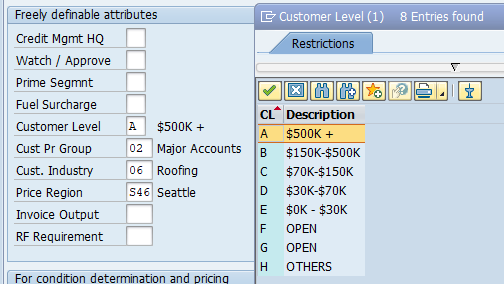

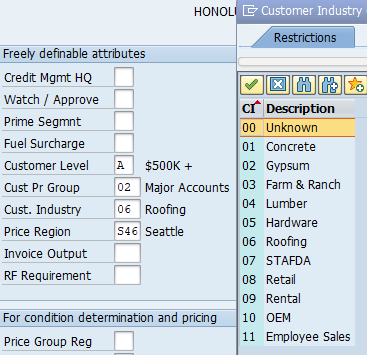

In [178]:
display(Image('https://i.imgur.com/noJ1n6M.png', width=450, unconfined=True))
display(Image('https://i.imgur.com/RLe7IPQ.png', width=450, unconfined=True))



Customer Level represents a static customer assignment based on what Distribution Center (DC) managers think the customer brings into the company. Customer Industry represents the main focus of what the customer sells, although, most overlap in more than one area. From this combination, the department determines which customer will get which price point. In theory, because there are 5 different price points for each item sold, the customer that brings in the most sales will receive the most discounted price and so on. 

Several problems arise with this methodology: 

1. The DC Manager is biased, and often to increase sales, they change customer level attributes to give them better pricing. 

2. The customer segmentation is static. The only way to reclassify all the customers is to make the DC manager go through them.

3. The customer industry classification has no purpose in methodology of choosing which customer getting which price. 

Thus, the weakness of the customer classification system that’s currently deployed at Murtada’s company is exposed. Only sales volume is used, hence only one of our variables: Monetary. 

As we have indicated in the past, the model we’re using for customer segmentation is more dynamic, objective, and insightful. The model gives us a more holistic and historically more accurate picture of the customers. Furthermore, exploring the three dimensional nature of the customer, we’ve suggested researched action steps for the sales team. Actions such as implementing more aggressive pricing incentives or beneficially letting go of “lost customers.” 

Murtada’s director plans to run a pilot with the new customer segmentations produced to test if they have increased conversion and revenue rates. This ultimately will also decrease marketing costs, since the department will not target low yielding customers. 

Additional data is not needed for this model, however, an additional variable will help elevate the customer segmentation process to a new level. The new feature added to the RFM would be ‘V’, which stands for velocity. How fast is the customer growing? What’s their trajectory. This adds an additional dimension to the analysis: RFMV. 
The model will need to be updated twice a year, in the winter season and in the summer season. However, for other companies, they can updated it as much as they want. 




# Exceptional Work

### Summary of Exceptional Work throughout the paper

$\textbf{3D Modeling}$ The additional 3D modeling demonstrates the relationship between the 3 primary metrics for customer behavior. The use of 3D modeling better shows the distinct clusters and how effective the different clustering techniques are.

$\textbf{Association Rules Modeling}$ The addition of association rule modeling shows the buying patterns associated with the items that are purchased. The three primary metrics associated with association rules (lift, support, and confidence) were mapped out using clustermaps. 

$\textbf{Timeseries graphs}$ The purchasing patterns of time were displayed in a graph to show the changes in buying patterns over time. This helped reinforce some of the observations found in the types of items purchased for the association rule modeling.



# Sources

Wordcloud - https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python